# **Project Name**    - Amazon Prime Video Content Analysis

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name** - Shreyash Gongale


# **Project Summary -**

The streaming industry has experienced exponential growth over the last decade, with platforms like Amazon Prime Video continuously expanding their content libraries. Understanding content trends on these platforms is crucial for businesses, content creators, and data analysts. This project aims to analyze the shows available on Amazon Prime Video using data analytics techniques. The objective is to uncover insights related to content diversity, regional availability, content trends over time, and IMDb ratings and popularity. By leveraging Python and data visualization libraries, we will explore patterns in the dataset and provide meaningful interpretations.

# **GitHub Link -**

# **Problem Statement**

*   List item
*   List item




The dataset used in this project includes detailed information about Amazon Prime Video's content, such as titles, genres, release years, IMDb ratings, production countries, and cast/crew details. Our analysis will focus on answering the following key questions:
* **Content Diversity:** Which genres and categories dominate the platform?
Regional Availability: How does content distribution vary across different countries?
* **Trends Over Time:** How has Amazon Prime’s content library evolved?
* **IMDb Ratings & Popularity:** What are the highest-rated or most popular shows?

Understanding these aspects will help stakeholders make data-driven decisions related to content acquisition, audience engagement, and subscription growth strategies.

#### **Define Your Business Objective?**

* **Identify Popular Content Categories -** Determine the most dominant genres and categories to guide content acquisition and marketing strategies.

* **Understand Regional Content Distribution -** Analyze how content availability varies across different regions to optimize localization efforts and licensing agreements.

* **Track Content Trends Over Time -** Examine how the platform’s content library has evolved to predict future content demand and audience preferences.

* **Analyze IMDb Ratings & Popularity -** Identify high-performing and underperforming shows to refine content recommendations and improve viewer engagement.

* **Enhance Audience Engagement Strategies -** Use insights to tailor content promotion, improve recommendation algorithms, and drive user retention.

* **Optimize Investment in Content Production -** Leverage data to make informed decisions on content acquisition, original productions, and regional partnerships.

* **Improve Competitive Positioning -** Benchmark Amazon Prime Video’s content strategy against competitors and identify growth opportunities in emerging markets

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [133]:
# Import Libraries
import pandas as pd                       # Used for data manipulation and analysis
import numpy as np                        # Used for numerical operations
import matplotlib.pyplot as plt           # Used for creating static, interactive, and animated visualizations
import seaborn as sns                     # Used for statistical data visualization

### Dataset Loading

In [134]:
# Load Dataset
# Function to load a CSV file into a pandas DataFrame
def load_csv(file_path):
    try:
        return pd.read_csv(file_path)  # Load the CSV file
    except Exception as e:
        print(f"Error: {e}")  # Print error message if loading fails
        return None  # Return None in case of failure

# Define file paths for the dfs
titles_path = '//content/titles.csv'  # File path for the 'titles' df
credits_path = '//content/credits.csv'  # File path for the 'credits' df

# Load the dfs using the load_csv function
df1 = load_csv(file_path=titles_path)  # Load titles df1
df2 = load_csv(file_path=credits_path)  # Load credits df2

In [135]:
# Merge the two dfs on the "id" column using a left join
df = pd.merge(df1, df2, on="id", how="left")

### Dataset First View

In [136]:
# Dataset First Look
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [137]:
# Dataset Rows & Columns count
print("Number of Rows =",df.shape[0])
print("Number of Columns =",df.shape[1])

Number of Rows = 125354
Number of Columns = 19


### Dataset Information

In [138]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125354 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125354 non-null  object 
 1   title                 125354 non-null  object 
 2   type                  125354 non-null  object 
 3   description           125163 non-null  object 
 4   release_year          125354 non-null  int64  
 5   age_certification     56857 non-null   object 
 6   runtime               125354 non-null  int64  
 7   genres                125354 non-null  object 
 8   production_countries  125354 non-null  object 
 9   seasons               8501 non-null    float64
 10  imdb_id               119978 non-null  object 
 11  imdb_score            118987 non-null  float64
 12  imdb_votes            118957 non-null  float64
 13  tmdb_popularity       124800 non-null  float64
 14  tmdb_score            114263 non-null  float64
 15  

#### Duplicate Values

In [139]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(168)

#### Missing Values/Null Values

In [140]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
title,0
type,0
description,191
release_year,0
age_certification,68497
runtime,0
genres,0
production_countries,0
seasons,116853


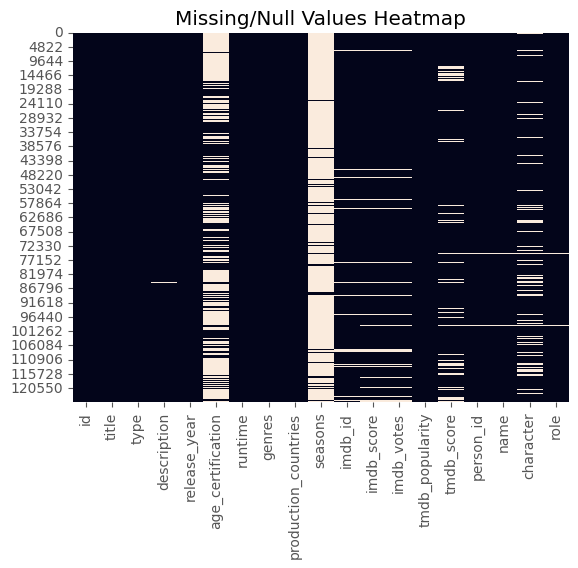

In [141]:
# Visualizing the missing values
# Create heatmap
sns.heatmap(df.isnull(), cbar=False)
# Adding Title
plt.title('Missing/Null Values Heatmap')
# Display
plt.show()

### What did you know about your dataset?

The Titles dataset contains information about Amazon Prime Video content, including id, title, type, genres, release_year, imdb_score, and tmdb_score. It helps analyze content diversity, trends, regional availability, and popularity. Some columns, like imdb_score, tmdb_score, and age_certification, have missing values that needs to be handled.
The Credits dataset contains cast and crew details, including id, name, character and role. Each title can have multiple associated actors and crew members. Some entries may have missing names.
Both datasets share a common id, making merging necessary for deeper analysis. Before merging, missing values and inconsistencies needs to be addressed.

## ***2. Understanding Your Variables***

In [142]:
# Dataset Columns
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

In [143]:
# Dataset Describe
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,125354.000000,125354.00000,8501.000000,118987.000000,1.189570e+05,124800.000000,114263.000000,1.243470e+05
mean,1996.374715,95.30792,2.335372,5.970856,2.311206e+04,10.134483,5.993077,4.062528e+05
std,27.758800,30.39349,3.164860,1.243967,8.816389e+04,40.666765,1.322900,5.614483e+05
min,1912.000000,1.00000,1.000000,1.100000,5.000000e+00,0.000011,0.800000,1.000000e+00
25%,1983.000000,82.00000,1.000000,5.200000,2.790000e+02,1.858000,5.300000,3.899600e+04
50%,2009.000000,93.00000,1.000000,6.100000,1.227000e+03,3.864000,6.100000,1.339340e+05
75%,2017.000000,109.00000,2.000000,6.800000,7.039000e+03,8.787000,6.800000,5.711600e+05
max,2022.000000,549.00000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000,2.371153e+06


### Variables Description

* **id -** Unique identifier for each title.
* **title -** Name of the movie or TV show.
* **type -** Type of content (e.g., Movie, Show).
* **description -** Brief summary of the content.
* **release_year -** Year the title was released.
* **age_certification -** Content rating (e.g., PG-13, R).
* **runtime -** The length of the episode(Show) or movie.
* **genres -** List of genres the title falls into.
* **production_countries -** Countries where the title was produced.
* **seasons -** Number of seasons if it's a show.
* **imdb_id -** The title ID on imdb.
* **imdb_score -** IMDb rating of the title.
* **imdb_votes -** Number of votes received on IMDb.
* **tmdb_popularity -** Popularity score from TMDb.
* **tmdb_score -** Rating from TMDb
* **person_id -** The person id on JustWatch
* **id -** The title id on JustWatch
* **name -** The actor or director's name
* **character_name -** Name of the character
* **role -** Role of the person (e.g., Actor or Director)

### Check Unique Values for each variable.

In [144]:
# Check Unique Values for each variable.
df.nunique()

,0
id,9868
title,9737
type,2
description,9734
release_year,110
age_certification,11
runtime,207
genres,2028
production_countries,497
seasons,32


## 3. ***Data Wrangling***

### Data Wrangling Code

In [145]:
# Write your code to make your dataset analysis ready.

# 1. Create a copy of the current dataset and assigning to df3
df3 = df.copy()

In [146]:
# 2. Removing description column
df3.drop(columns = 'description', inplace = True)

In [147]:
# 3. Display the shape of the df3 (rows, columns)
df3.shape

(125354, 18)

In [148]:
# 4. Dataset Duplicate Value Count
print('Total Duplicates in Dataset =',df3.duplicated().sum())

Total Duplicates in Dataset = 168


In [149]:
# 5. Remove Duplicates
df3.drop_duplicates(inplace=True)

In [150]:
# 6. Check for duplicate records based on specific columns
df3.duplicated(subset=['id' ,'person_id','name' , 'character']).sum()

np.int64(64)

In [151]:
# 7. Remove duplicate rows while keeping the first occurrence
df3.drop_duplicates(subset=['id' ,'person_id','name' , 'character'],keep= 'first',inplace=True)

In [152]:
# 8. Dataset shape after removing duplicates
df3.shape

(125122, 18)

In [153]:
# 9. Checking null values for each column
df3.isnull().sum()

,0
id,0
title,0
type,0
release_year,0
age_certification,68277
runtime,0
genres,0
production_countries,0
seasons,116621
imdb_id,5371


In [154]:
# 10. Check the number of movies that have null values in the 'seasons' column
print(df3[(df3['type'] == 'MOVIE') & (df3['seasons'].isnull())].shape)

(116621, 18)


In [155]:
# 11. Display the count of unique values in the 'seasons' column (including NaN)
print(df3['seasons'].value_counts(dropna=False).head())

seasons
NaN    116621
1.0      5102
2.0      1313
3.0       741
4.0       371
Name: count, dtype: int64


In [156]:
# 12. Replace NaN values in 'seasons' with 0 for movies (since movies don’t have seasons)
df3['seasons']=df3.apply(lambda x : 0 if x['type'] == 'MOVIE' else x['seasons'] ,axis=1)

In [157]:
# 13. Fill missing values in the 'age_certification' and  'character' columns with 'Unknown'
df3.fillna({'age_certification' : 'Unknown' ,'character' : 'Unknown' } ,inplace=True)

In [158]:
# 14. Re-check for missing values
df3.isnull().sum()

,0
id,0
title,0
type,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0
imdb_id,5371


In [159]:
# 15. Drop remaining rows with missing values
df3.dropna(inplace=True)

In [160]:
# 16. Display the shape of the df (rows, columns) after manipulation
df3.shape

(109393, 18)

In [161]:
# 17. Check the number of rows where 'genres' or 'production_countries' is empty
print(df3[df3["genres"] == "[]"].shape)
print(df3[df3["production_countries"] == "[]"].shape)

(73, 18)
(1094, 18)


In [162]:
# 18. Remove rows where 'genres' or 'production_countries' are empty
df3 = df3[df3["genres"] != "[]"]
df3 = df3[df3["production_countries"] != "[]"]

In [163]:
# 19. Display the shape of the df after filtering
df3.shape

(108227, 18)

In [164]:
# 20. Print the maximum and minimum release years
print(df3['release_year'].max())
print(df3['release_year'].min())

2022
1912


In [165]:
# 21. Filter df to include only titles released from 2000 onwards | Keep only titles released in 2000 or later
df3 = df3[df3['release_year'] >= 2000]

In [166]:
# 22. Convert 'seasons' and 'person_id' columns to integer type
df3['seasons'] = df3['seasons'].astype(int)
df3['person_id'] = df3['person_id'].astype(int)

In [167]:
# 23. Extract the primary genre from the list of genres
df3['primary_genre'] = df3['genres'].apply(lambda x: str(x.split(',')[0]).strip('[]'))

# 24. Extract the primary country from the list of production countries
df3['primary_country'] = df3['production_countries'].apply(lambda x: str(x.split(',')[0]).strip('[]'))

In [168]:
# 25. Remove extra quotation marks from extracted genre and country values
df3["primary_genre"] = df3["primary_genre"].str.strip("'")
df3["primary_country"] = df3["primary_country"].str.strip("'")

In [169]:
# 26. Create a new variable which keeps rows where age certification is 'Unknown'
df_unknown = df3[df3['age_certification'] != 'Unknown']

In [170]:
# 27. Filtering df to include only TV Shows and storing in a variable
tv_shows = df3[df3['type'] == 'SHOW']

In [171]:
# 28. Rename 'type' column to 'content_type' for consistency
df3.rename(columns={'type': 'content_type'}, inplace=True)

In [172]:
# Display the first few rows of the updated dataset
df3.head()

,id,title,content_type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role,primary_genre,primary_country
37910,ts20981,Survivor,SHOW,2000,TV-PG,48,['reality'],['US'],42,tt0239195,7.4,24368.0,73.107,7.3,91091,Jeff Probst,Himself - Host,ACTOR,reality,US
38300,tm28243,The Gift,MOVIE,2000,R,112,"['drama', 'thriller', 'documentation', 'action...",['US'],0,tt0219699,6.7,67946.0,14.202,6.4,2859,Cate Blanchett,Annie Wilson,ACTOR,drama,US
38301,tm28243,The Gift,MOVIE,2000,R,112,"['drama', 'thriller', 'documentation', 'action...",['US'],0,tt0219699,6.7,67946.0,14.202,6.4,3085,Giovanni Ribisi,Buddy Cole,ACTOR,drama,US
38302,tm28243,The Gift,MOVIE,2000,R,112,"['drama', 'thriller', 'documentation', 'action...",['US'],0,tt0219699,6.7,67946.0,14.202,6.4,3036,Keanu Reeves,Donnie Barksdale,ACTOR,drama,US
38303,tm28243,The Gift,MOVIE,2000,R,112,"['drama', 'thriller', 'documentation', 'action...",['US'],0,tt0219699,6.7,67946.0,14.202,6.4,6720,Katie Holmes,Jessica King,ACTOR,drama,US


### What all manipulations have you done and insights you found?

Some of the manipulations performed are-
1. **Column Selection -** Kept columns which are necessary for analysis i.e id, title, content_type, release_year, genres, seasons, imdb_score etc.
2. **Handling Duplicates -**
* Dropped duplicate rows from the dataset to ensure there are unique entries in the dataset.
* Checked duplicates based on specific columns (id, person_id, name, character) and removed them.
3. **Handling Missing Values -**
* Checked the total missing values in each column.
* Replaced missing values in age_certification and character column with "Unknown".
* Since movies do not have any seasons, we set seasons as 0 for movies.
* Removed any remaining missing values.
4. **Handling Empty Values -** Dropped rows where genres or production_countries were empty to ensure data validity.
5. **Filtering by Release Year -** Kept titles which were released only from 2000 onwards, ensuring focus on recent content.
6. **Data Type Conversion -**
* Converted seasons and person_id column to integer data type to maintain consistency.
* Extracted primary_genre from genres column and primary_country from production_countries column.
* Cleaned the extracted values by removing whitespaces and unnecessary characters.
---
Some of the insights found are-
1. Most titles in the dataset are from 2000 year onwards, resulting that older content are either less available or less relevant for this platform.
2. Many movies were having missing values for seasons which were logically replaced with 0.
3. There were some data with missing age_certification column which was replaced with "Unknown" to ensure data consistency.
4. To make the visualization and analysis easier, dataset is been simplified by extracting primary_genre and primary_country.
5. This helps to get better insights into which genres and production locations are dominating the platform.
6. Identified and removed few duplicate rows in order to prevent overrepresentation of certain titles in the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [173]:
# Setting style for visualization
plt.style.use('ggplot')

### **Univariate Analysis**

#### Chart - 1 - Content Type Distribution

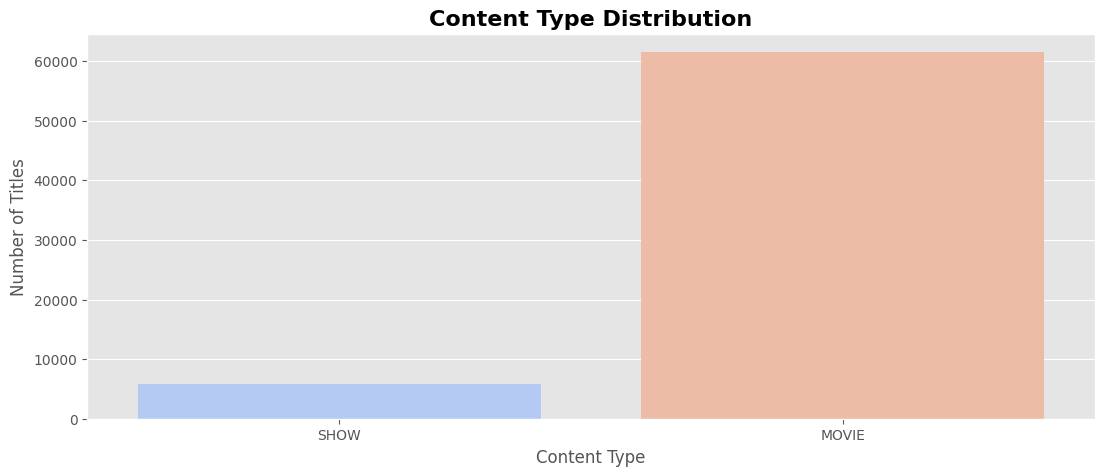

In [174]:
# Chart - 1 visualization code

# Setting figure size
plt.figure(figsize=(13, 5))

# Create countplot
ax = sns.countplot(data=df3, x='content_type', palette='coolwarm', hue = 'content_type')

# Add Titles and Labels
plt.title('Content Type Distribution', fontsize=16,fontdict={'fontweight':'bold'})
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A count plot was chosen because-
* It effectively displays the frequency distribution of categorical variables (Movies vs. TV Shows).
* It provides a clear visual comparison, making it easy to identify which content type is more prevalent in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that-
* Movies have a higher count than TV Shows in the dataset.
* This suggests that the platform Amazon Prime focuses more on Movies compared to TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* If the platform sees that Movies are more popular, they can invest in acquiring or producing more Movies to align with audience preferences.
* Understanding content distribution helps in marketing strategies and licensing deals.

**Potential Negative Growth:**
* If TV Shows have lower counts, but demand for them is high, the platform might be missing an opportunity by not producing or acquiring enough TV Shows.
* If users prefer long-form content (TV Shows) for engagement, an over-reliance on Movies could lead to lower retention rates.

#### Chart - 2 - IMDB Score Distribution (Box Plot)

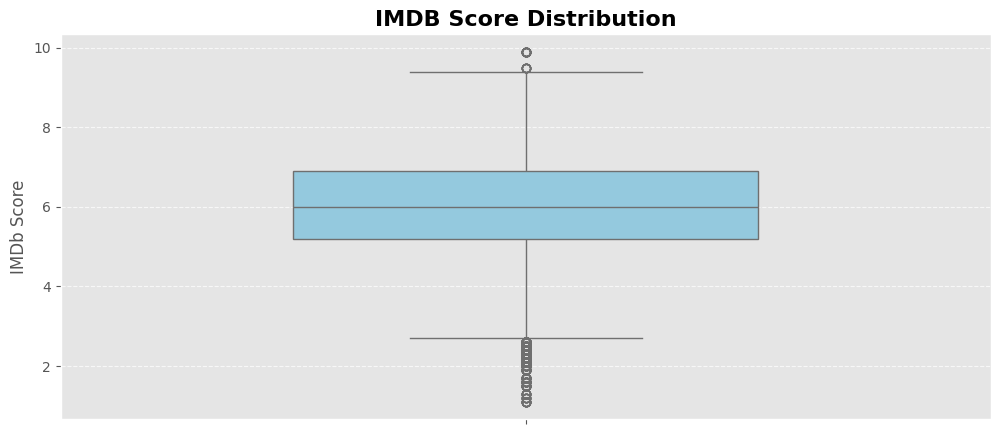

In [175]:
# Chart - 2 visualization code

# Set Figure Size
plt.figure(figsize=(12, 5))

# Create Box Plot
sns.boxplot(y= df3['imdb_score'], color = 'skyblue', width = 0.5)

# Add Labels and Title
plt.ylabel("IMDb Score", fontsize=12)
plt.title("IMDB Score Distribution", fontsize=16, fontdict={'fontweight':'bold'})

# Add grid for better readability
plt.grid(axis = 'y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot effectively visualizes the distribution, central tendency, and outliers in IMDB scores. It helps in identifying:
* The spread of scores (range, quartiles, median).
* Any potential outliers (very low or very high scores).
* Whether the distribution is skewed.

##### 2. What is/are the insight(s) found from the chart?

* Most movies and TV shows on Amazon Prime have average ratings (5-7).
* Very few titles exceed a rating of 9, indicating that high-rated content is rare.
* There are outliers on the lower end, meaning some content has received very poor ratings.
* The distribution is slightly left-skewed, meaning there are more poorly rated movies/shows than exceptionally rated ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Identifying top-rated content (above 7.5) can help Amazon Prime promote or recommend quality content to retain users.
* Knowing that most content falls between 5-7, Amazon can focus on improving production quality to push scores higher.

**Negative Indicators:**
* The presence of low-rated content (below 4) could negatively impact brand perception and user engagement.
* If poorly rated content dominates a genre, it may discourage subscriptions or lead to customer churn.

#### Chart - 3 - IMDB Score Distribution (Histogram)

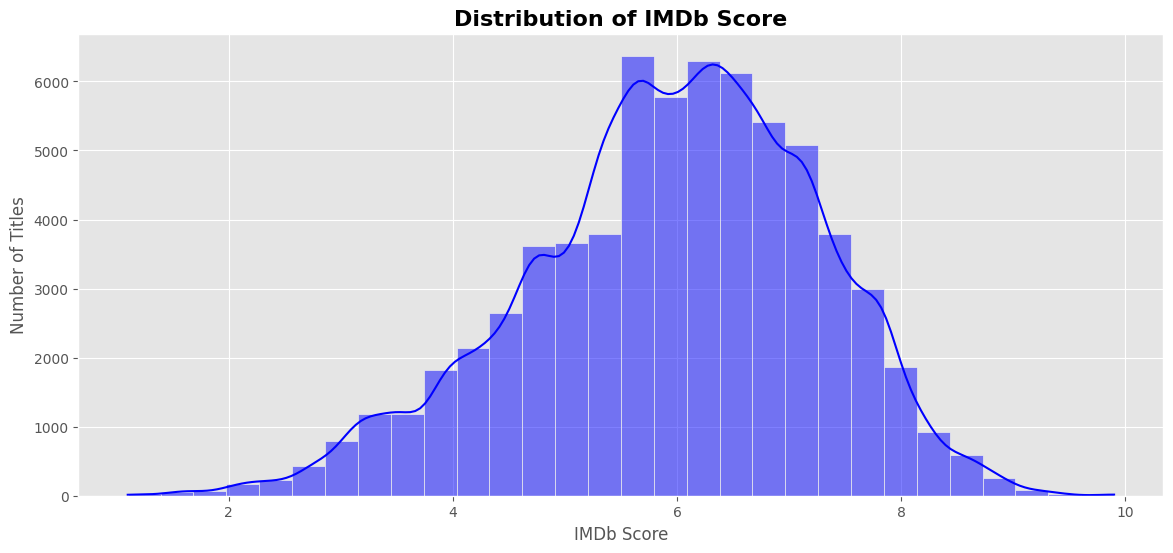

In [176]:
# Chart - 3 visualization code

# Set Figure Size
plt.figure(figsize=(14, 6))

# Create Histogram
sns.histplot(df3['imdb_score'], bins=30, kde=True, color='blue')

# Add Titles and Labels
plt.xlabel("IMDb Score", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.title("Distribution of IMDb Score", fontsize=16,fontdict={'fontweight':'bold'})

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram helps in understanding the overall distribution of IMDB scores by showing how frequently each score range appears.
* It provides a clearer picture of how ratings are spread across content compared to other charts like bar plots or scatter plots.
* It also highlights density and patterns in the dataset, helping to see whether the ratings are normally distributed or skewed.

##### 2. What is/are the insight(s) found from the chart?

* The majority of content has IMDB scores between 5 and 7, meaning most titles are neither outstanding nor terrible.
* The presence of fewer titles with scores above 8 indicates that high-quality content is not dominant on Amazon Prime.
* A long tail on the left side (low IMDB scores) suggests some poorly rated content, which could impact customer retention

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Understanding that most content falls in the mid-range (5-7) can help Amazon improve content selection and marketing strategies.
* Promoting and producing more high-rated content (7+) could attract more subscribers and improve platform reputation.

**Negative Indicators:**
* If a large portion of content is below 5, it could lead to negative customer experiences, causing churn.
* If high-rated content (8-10) is too rare, Amazon may struggle to compete with other platforms like Netflix or Disney+, which focus on premium content.

#### Chart - 4 - TMDB Popularity Distribution (Histogram)

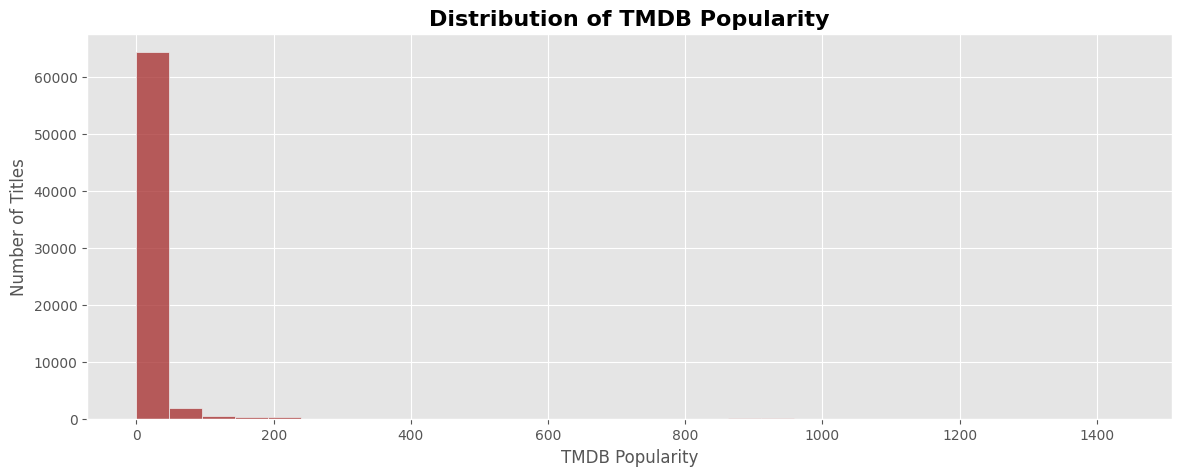

In [177]:
# Chart - 4 visualization code

# Set Figure Size
plt.figure(figsize=(14, 5))

# Create Histogram
sns.histplot(df3['tmdb_popularity'], bins=30, color='brown')

# Add Labels and Titles
plt.xlabel("TMDB Popularity", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.title("Distribution of TMDB Popularity", fontsize=16,fontdict={'fontweight':'bold'})

# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A histogram was chosen-
* To analyze the distribution of TMDb popularity because it effectively shows how popularity values are spread across different ranges.
* This helps in identifying whether most shows have low or high popularity, as well as detecting any outliers.

##### 2. What is/are the insight(s) found from the chart?

* The TMDb popularity distribution is highly right-skewed, meaning that most shows have low popularity, while a few shows have extremely high popularity.
* The median popularity is 3.86, indicating that at least half of the shows have a very low popularity score.
* A few outliers exist, with the maximum popularity reaching 1437.9, suggesting that only a handful of shows drive the majority of viewership.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
* The skewed distribution indicates that Amazon Prime can focus its marketing and recommendation algorithms on highly popular shows, as these are the main drivers of user engagement.
* The insights can help in content acquisition, allowing Amazon to invest in more shows similar to the highly popular ones to increase watch time and subscriptions.

**Negative Growth Insights:**
* The high skewness suggests that most of the content on Amazon Prime is not gaining significant popularity.
* This could indicate that a large portion of the catalog is not engaging enough, leading to inefficient content spending.
* If Amazon continues investing in low-performing shows, it may result in financial losses and a lack of subscriber retention.

#### Chart - 5 - TMDB Popularity Distribution (Box Plot)

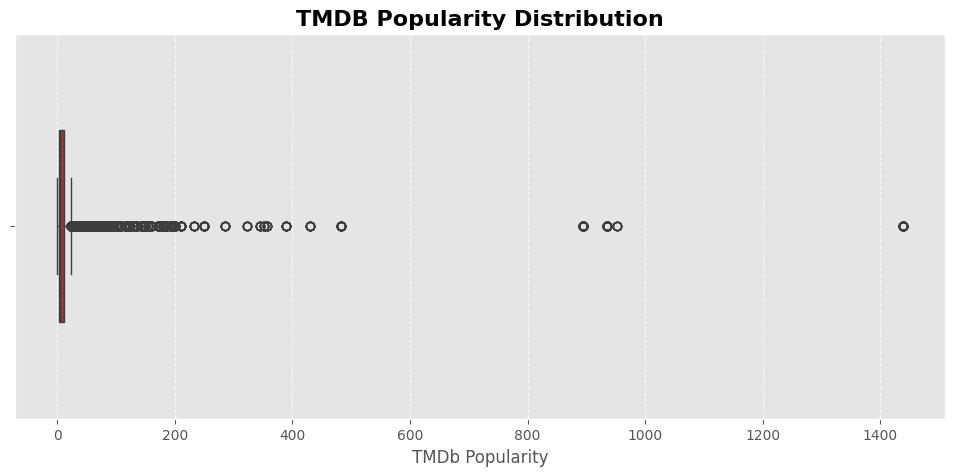

In [178]:
# Chart - 5 visualization code

# Set Figure Size
plt.figure(figsize=(12, 5))

# Create Box Plot
sns.boxplot(x= df3['tmdb_popularity'], color = 'brown', width = 0.5)

# Add Labels and Titles
plt.xlabel("TMDb Popularity", fontsize=12)
plt.title("TMDB Popularity Distribution", fontsize=16, fontdict={'fontweight':'bold'})

# Add grid for better readability
plt.grid(axis = 'x', linestyle='--', alpha=0.7)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

The box plot was chosen-
* To effectively visualize the distribution and outliers in TMDb popularity data.
* It helps in understanding the spread of popularity scores, the presence of extreme values, and whether the data is skewed.
* Unlike histograms, box plots provide a clear view of median, quartiles, and outliers in a compact visual.

##### 2. What is/are the insight(s) found from the chart?

* The median TMDb popularity score is around 5.5, meaning half of the shows have a popularity score below this.
* The interquartile range (IQR) (between Q1 and Q3) suggests that most shows have popularity values between 2.88 and 11.20.
* There are numerous outliers, with some shows reaching a maximum popularity of 1437.90, indicating a few exceptionally popular shows while the majority have lower scores.
* The distribution is heavily right-skewed, meaning that while a few shows are extremely popular, most have much lower popularity scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* The presence of high outliers indicates that certain shows are driving significant engagement.
* Identifying characteristics of these high-performing shows (e.g., genre, cast, release year, region) can help Amazon Prime focus on acquiring or producing similar content to increase user retention and subscription growth.

**Negative Impact:**
* The skewed distribution shows that a large portion of the catalog has very low popularity.
* If too many shows are underperforming, it suggests inefficient content investment.
* Amazon Prime might need to reassess its content strategy, remove underperforming content, or improve discoverability through better recommendations.

#### Chart - 6 - Runtime Distribution (Histogram)

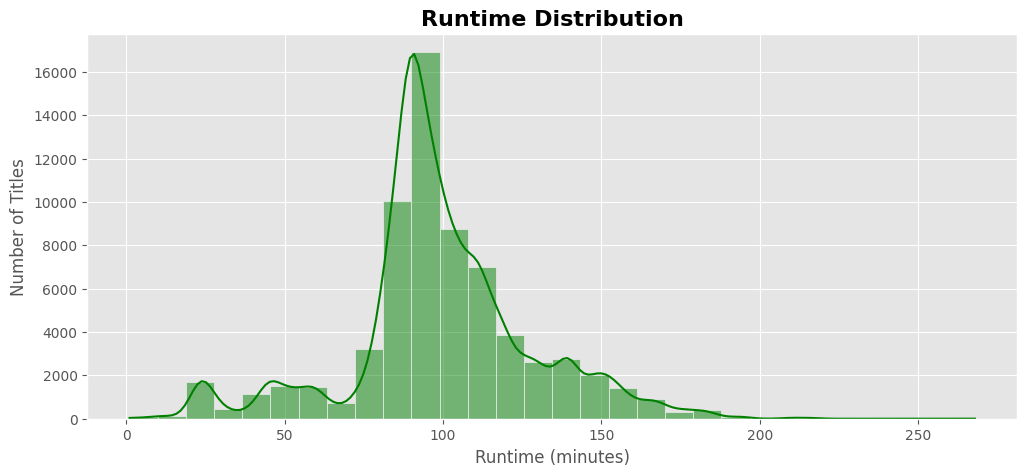

In [179]:
# Chart - 6 visualization code

# Set Figure Size
plt.figure(figsize=(12, 5))

# Create Histogram
sns.histplot(df3['runtime'], bins=30, kde=True, color='green')

# Add Labels and Titles
plt.xlabel("Runtime (minutes)", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.title("Runtime Distribution", fontsize=16, fontdict={'fontweight':'bold'})

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen to visualize the distribution of runtime across Amazon Prime shows and movies.
* It helps to understand how frequently different runtime durations appear in the dataset.
* It shows whether the data is normally distributed, skewed, or contains multiple peaks.
* Unlike a box plot, a histogram provides a detailed frequency distribution, making it easier to see which runtimes are most common.

##### 2. What is/are the insight(s) found from the chart?

* The majority of shows and movies have a runtime between 40 and 120 minutes, with a peak around 90 minutes (which is a typical movie length).
* A few very high runtime values exist, pushing the mean higher than the median.
Some extreme outliers have runtimes above 300 minutes (5 hours), which could indicate long documentaries, TV series, or data anomalies.
* A noticeable number of shows/movies have runtimes below 30 minutes, suggesting the presence of short films or episodes of a series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
* Since most content aligns with standard movie and TV episode lengths, Amazon Prime can optimize user engagement by prioritizing content that falls within these durations.
* Short-form content demand: If a significant portion of users watches short-form content, Amazon Prime could invest in mini-series or exclusive short films to attract more users.

**Negative Impact:**
* Long runtime content may discourage viewers: If some content exceeds 3+ hours, users might abandon watching it halfway, leading to lower completion rates.
* Potential data anomalies: If some content has extremely high runtimes (e.g., 1200 minutes), it might be an error in the dataset that needs correction.

#### Chart - 7 - Runtime Distribution (Box Plot)

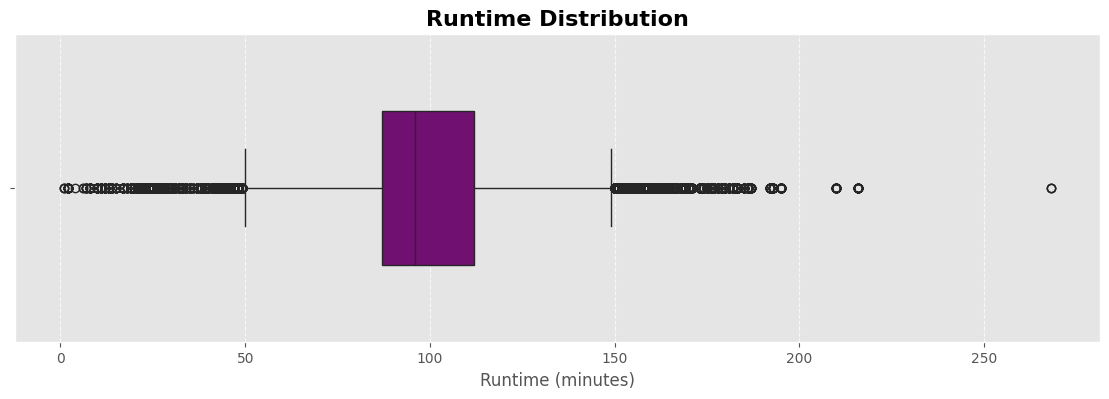

In [180]:
# Chart - 7 visualization code

# Set Figure Size
plt.figure(figsize=(14, 4))

# Create Box Plot
sns.boxplot(x= df3['runtime'], color = 'purple', width = 0.5)

# Add Labels and Titles
plt.xlabel("Runtime (minutes)", fontsize=12)
plt.title("Runtime Distribution", fontsize=16, fontdict={'fontweight':'bold'})

# Add grid for better readability
plt.grid(axis = 'x', linestyle='--', alpha=0.7)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is the best choice-
* To visualize the distribution of runtime because it effectively highlights key statistical measures such as median, quartiles, and outliers.
* It allows us to detect any extreme values (very short or long runtimes) and provides a clear understanding of data spread and variability.

##### 2. What is/are the insight(s) found from the chart?

* The median runtime is around 96 minutes.
* The interquartile range (IQR) spans from 87 to 112 minutes, indicating that most movies fall within this duration.
* There are outliers on both ends, Some movies have extremely short runtimes (possibly short films or episodes).
* A few movies have long runtimes exceeding 200 minutes, which could be extended versions or documentaries.
* The overall distribution suggests that Amazon Prime predominantly features standard-length movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Knowing that most movies fall within the 90-110 minute range helps Amazon Prime optimize content acquisition strategies.
* If longer movies are not as popular, they might not be prioritized for licensing.
* Identifying runtime trends can help in curating recommendations based on user preferences.

**Negative Growth:**
* A high number of outliers (extremely short or long movies) may lead to inconsistent viewer experiences.
* If users prefer standard-length content, excessive short films or lengthy movies could reduce engagement and watch time.
* If long movies have low viewership, licensing them might not be a cost-effective strategy.

#### Chart - 8 - TV Show Seasons Distribution

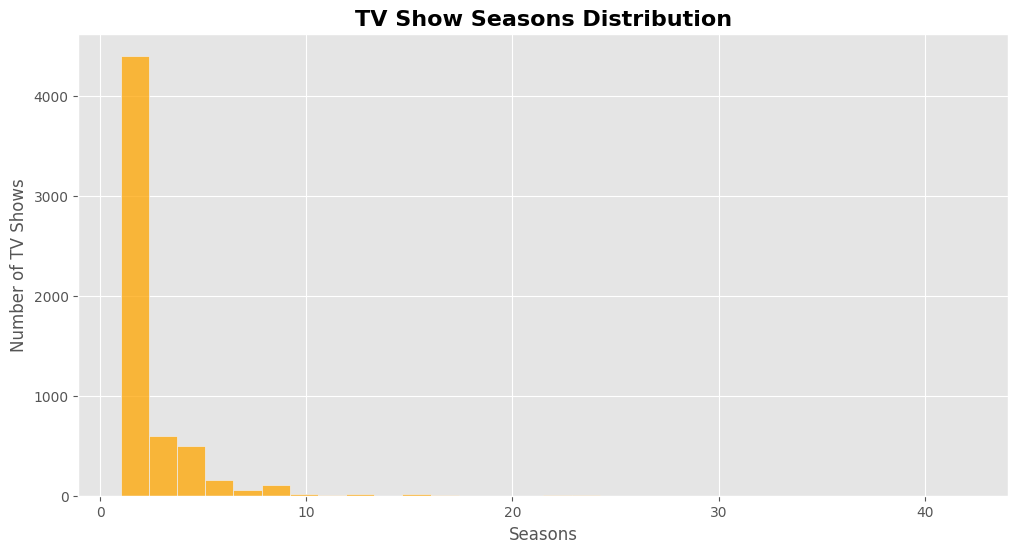

In [181]:
# Chart - 8 visualization code

# Filtering records to display only TV Show
tv_shows = df3[df3['content_type']=='SHOW']

# Set Figure Size
plt.figure(figsize=(12, 6))

# Create Histogram
sns.histplot(tv_shows['seasons'], bins=30, color='orange')

# Add Titles and Labels
plt.xlabel("Seasons", fontsize=12)
plt.ylabel("Number of TV Shows", fontsize=12)
plt.title("TV Show Seasons Distribution", fontsize=16, fontdict={'fontweight':'bold'})

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is the best choice-
* For visualizing the distribution of TV show seasons because it provides a clear view of how frequently different season counts appear.
* It helps in identifying common season lengths and detecting any skewness in the data.

##### 2. What is/are the insight(s) found from the chart?

* The majority of TV shows on Amazon Prime have only one season, as indicated by the high bar at the start of the distribution.
* There are progressively fewer TV shows with more seasons, with a sharp decline after around 5 seasons.
* A very small number of TV shows have more than 10 seasons, making them rare cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Since most TV shows have only one season, this indicates a trend of short-lived series, which might be due to cancellation, limited series formats, or experimental content strategies.
* If audience engagement is strong for multi-season shows, Amazon Prime may consider investing more in long-running series to retain subscribers.
* If the high count of single-season shows indicates low viewer retention, it may suggest the need to improve content selection or marketing strategies.

**Negative Impact:**
* This could indicate that many shows fail to attract a large enough audience to warrant renewal.
* If users prefer long-running shows but the platform offers mostly short-lived series, it could lead to subscriber dissatisfaction and churn.
* If Amazon Prime wants to compete with platforms like Netflix, which has several multi-season successful series, they might need to focus on producing or acquiring more multi-season content.

### **Bivariate Analysis**

#### Chart - 9 - Top 10 Popular Genres by Number of Titles (Categorical - Numerical)

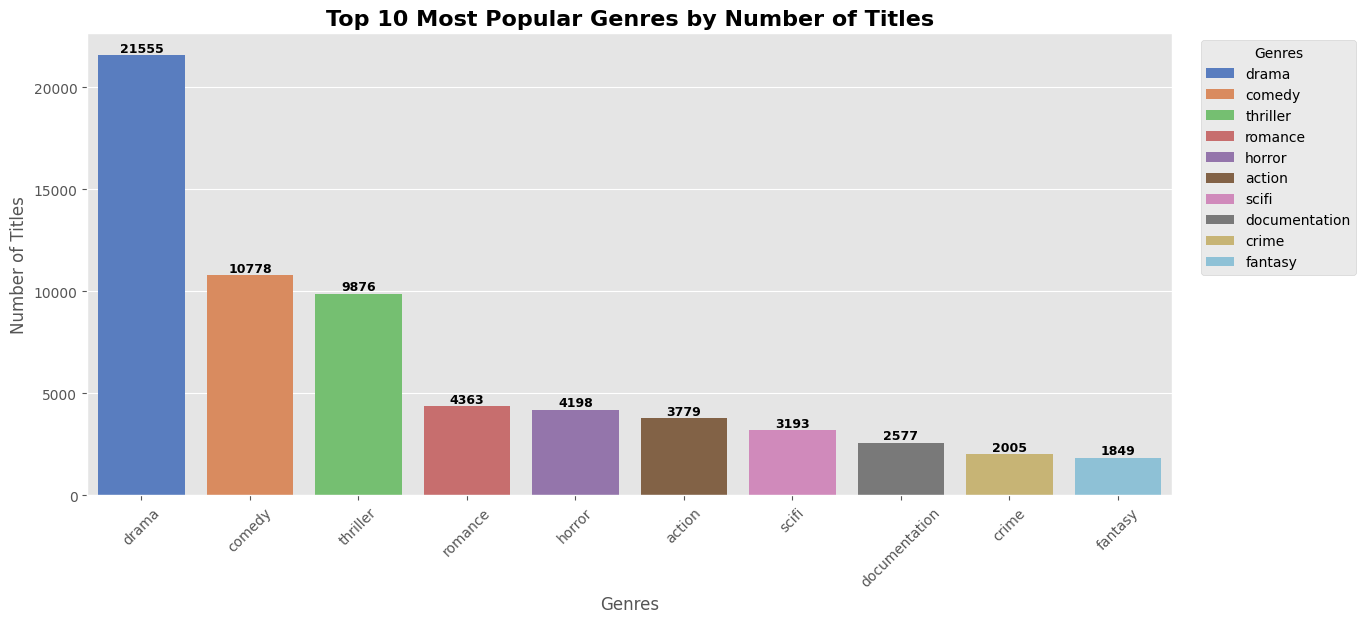

In [182]:
# Chart - 9 visualization code

# Removing extra quotations
df3['primary_genre'] = df3['primary_genre'].str.strip("'")

# Set Figure Size
plt.figure(figsize=(14, 6))

# Sort values in descending order
top_genres = df3['primary_genre'].value_counts().sort_values(ascending= False).head(10)

# Create Bar Plot
ax = sns.barplot(x=top_genres.index, y=top_genres.values, palette="muted",hue = top_genres.index, legend = True)

# Add Data Labels
for p in ax.patches:
    height = p.get_height()

    # Only add labels if the height is greater than zero
    if height > 0:
        ax.annotate(f'{height:.0f}',  # Format value to 1 decimal place
                    (p.get_x() + p.get_width()/2, height),  # Position at the top of the bar
                    ha='center', va='center', fontsize=9, fontweight='bold',
                    color='black', xytext=(0, 5), textcoords='offset points')  # Offset text slightly for better visibility

# Add Titles and Labels
plt.title('Top 10 Most Popular Genres by Number of Titles', fontsize=16, fontdict={'fontweight':'bold'})
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

# Add Legend
plt.legend(title="Genres", bbox_to_anchor=(1.02, 1), loc="upper left")

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is the best choice-
* For comparing categorical data, such as the number of titles in different genres.
* It clearly shows the distribution of genres and allows for an easy comparison between them.

##### 2. What is/are the insight(s) found from the chart?

* Drama is the most dominant genre, with 21,555 titles, nearly double the number of comedy titles.
* Comedy (10,778 titles) and Thriller (9,876 titles) follow as the second and third most popular genres.
* Fantasy (1,849 titles) and Crime (2,005 titles) have the lowest number of titles among the top 10.
* The dataset shows a strong preference for narrative-driven genres (Drama, Thriller, and Romance), whereas niche genres like Crime and Fantasy have limited representation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Since Drama is the most abundant genre, Amazon Prime might focus on differentiating its drama offerings by creating high-quality, original content to stand out.
* Comedy and Thriller are also highly available, suggesting strong audience demand. Increasing the production of comedy specials or thriller series might further engage users.
* Fantasy and Crime are underrepresented, which could indicate an opportunity for Amazon Prime to invest more in these genres and attract niche audiences.

**Negative Impact:**
* Too many titles in one genre might lead to audience fatigue, reducing engagement with new releases.
* Low diversity in available genres (e.g., Fantasy and Crime having fewer titles) might cause some users to switch to competitors that offer more variety (e.g., Netflix's strong Fantasy lineup).
* A more balanced genre distribution could improve customer retention and satisfaction.

#### Chart - 10 - Top 10 Countries Producing Movies & TV Shows (Categorical - Numerical)

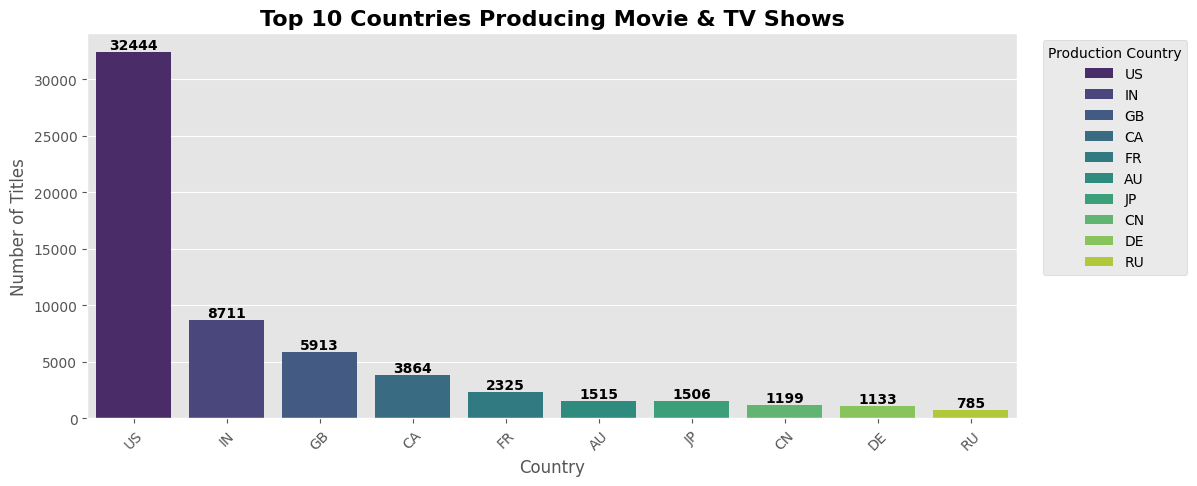

In [183]:
# Chart - 10 visualization code

# Set Figure Size
plt.figure(figsize=(12, 5))

# Finding Top 10 Countries
country_counts = df3['primary_country'].value_counts().nlargest(10)

# Create Bar Plot
ax =sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis", hue = country_counts.index, legend= True)

# Add Data Labels
for p in ax.patches:
    height = p.get_height()

    # Only add labels if the height is greater than zero
    if height > 0:
        ax.annotate(f'{height:.0f}',  # Format value to 1 decimal place
                    (p.get_x() + p.get_width()/2, height),  # Position at the top of the bar
                    ha='center', va='center', fontsize=10, fontweight='bold',
                    color='black', xytext=(0, 5), textcoords='offset points')  # Offset text slightly for better visibility

# Add Titles and Labels
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.title("Top 10 Countries Producing Movie & TV Shows", fontsize=16, fontweight = 'bold')

# Add Legend
plt.legend(title="Production Country", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is the best choice-
* For comparing categorical data, such as the number of titles produced by different countries.
* It allows for an easy visual comparison of which countries contribute the most to the film and TV industry.

##### 2. What is/are the insight(s) found from the chart?

* The United States (US) dominates the industry, producing 32,444 titles, which is nearly 4 times higher than India (8,711 titles), the second-highest country.
* India (IN) and the United Kingdom (GB) are the next major content producers, with 8,711 and 5,913 titles, respectively.
* Other notable contributors include Canada (CA - 3,864 titles), France (FR - 2,325 titles), and Australia (AU - 1,515 titles).
* Russia (RU) has the lowest number of titles among the top 10, producing 785 titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* US-based content dominates, so licensing or producing more original US-based titles can appeal to a large audience.
* India and the UK have strong content production, suggesting an opportunity to expand regional content availability in Hindi, Tamil, or English (British content).
* China (CN) and Russia (RU) have relatively lower production volumes, indicating a potential market for foreign content distribution.
* Streaming services can increase international partnerships with Canada, France, and Japan to acquire content for global audiences.

**Negative Impact:**
* Overdependence on US production means Amazon Prime might struggle in regions where local content is more popular (e.g., China, Japan, or Russia).
* Limited diversity in content sources can cause audiences from underrepresented countries to seek local streaming alternatives.
* Regulatory issues in countries like China might restrict the availability of US-based content, impacting market penetration.

#### Chart - 11 - Growth of Content Type Over Time (Categorical - Numerical)

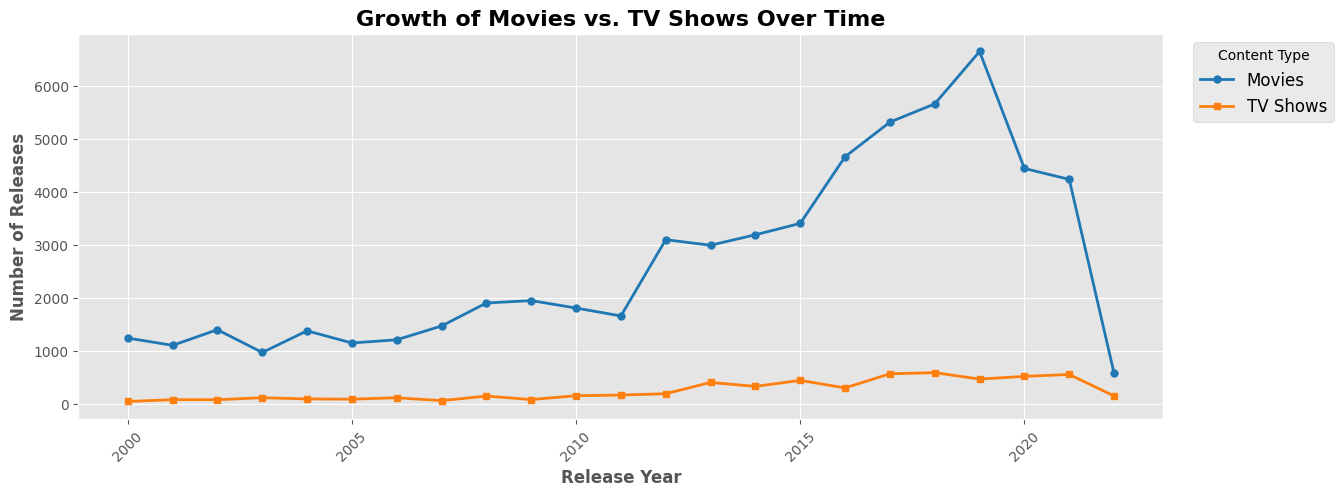

In [184]:
# Chart - 11 visualization code

# Count movies and shows per year
content_trend = df3.groupby(['release_year', 'content_type']).size().unstack().fillna(0)

# Define color palette for better visualization
colors = {"MOVIE": "#1f77b4", "SHOW": "#ff7f0e"}  # Blue for Movies, Orange for Shows

# Create figure and axis
plt.figure(figsize=(14, 5))

# Plot Movie Growth
plt.plot(content_trend.index, content_trend["MOVIE"], marker='o', linestyle='-',
         color=colors["MOVIE"], label="Movies", linewidth=2, markersize=5)

# Plot Show Growth
plt.plot(content_trend.index, content_trend["SHOW"], marker='s', linestyle='-',
         color=colors["SHOW"], label="TV Shows", linewidth=2, markersize=5)


# Set labels and title
plt.xlabel("Release Year", fontsize=12, fontweight='bold')
plt.ylabel("Number of Releases", fontsize=12, fontweight='bold')
plt.title("Growth of Movies vs. TV Shows Over Time", fontsize=16, fontweight='bold')

# Align legend properly
plt.legend(title="Content Type", loc="upper left", fontsize=12, frameon=True, bbox_to_anchor=(1.02, 1))


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is ideal for-
* Visualizing trends over time.
* It helps in understanding how movie and TV show releases have evolved across different years and whether there are any patterns or significant changes in content production.

##### 2. What is/are the insight(s) found from the chart?

* Movies have seen significant growth, especially after 2010, reaching a peak between 2018 and 2019 with over 6,000 releases.
* TV shows have remained relatively stable, with only a slight increase after 2010, but their numbers are much lower compared to movies.
* A sharp decline in both movies and TV shows occurred around 2020, which could be linked to the COVID-19 pandemic disrupting the entertainment industry.
* From 2000 to 2010, the movie industry had moderate growth, but after 2010, movie production surged significantly, indicating a boom in digital content platforms like Netflix, Amazon Prime, and Disney+.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Understanding industry trends: The rise in movie production suggests that investing in exclusive movies can drive user engagement.
* Content strategy optimization: Since TV shows have lower but stable production, focusing on long-term series with high retention can be beneficial.
* Post-pandemic recovery planning: Given the decline in 2020, streaming services should track whether production is rebounding in recent years and align their content acquisition accordingly.
* Investment decisions: The rise in movie production post-2010 aligns with the boom of streaming services, suggesting that original movie production is a profitable strategy.

**Negative Impact:**
* Pandemic-related disruptions in 2020, which halted production and delayed many movies.
* Market saturation, meaning too many movies were released between 2015-2019, leading to possible demand fatigue among audiences.
* The slow but steady growth of TV shows suggests that viewers might prefer long-form storytelling (series) over one-time movie releases.

#### Chart - 12 - Top 10 Movie Genre by Average IMDB Score (Categorical - Numerical)

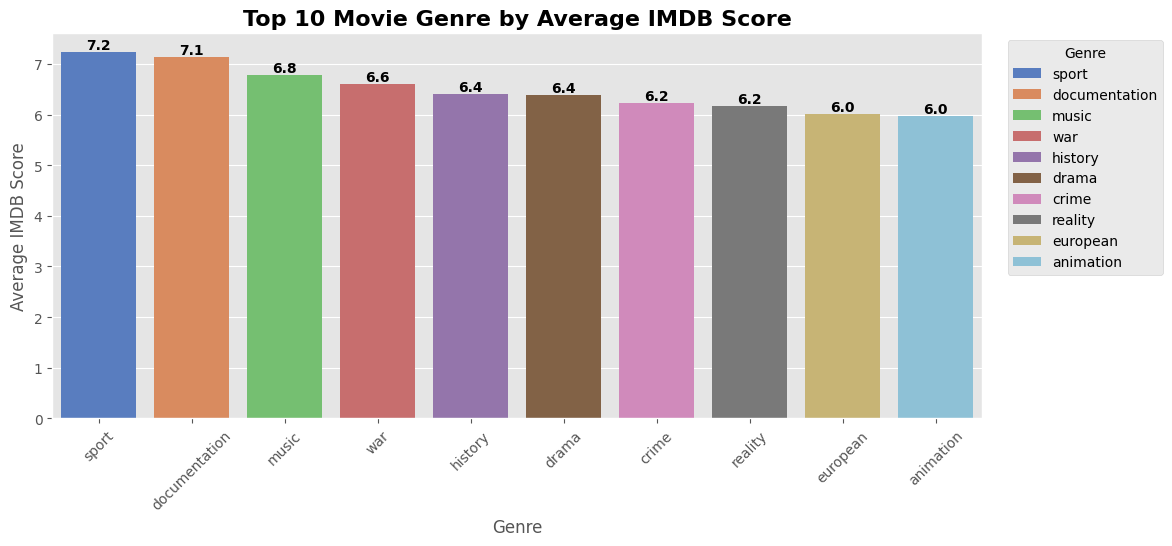

In [185]:
# Chart - 12 visualization code

# Group data by genre and calculate the average IMDb score
genre_avg_imdb = (
    df3.groupby(['primary_genre'])['imdb_score']
    .mean()
    .round(2)  # Round IMDb scores to 2 decimal places for better readability
    .reset_index()
    .sort_values(by='imdb_score', ascending=False)  # Sort genres by IMDb score in descending order
    .head(10)  # Select the top 10 genres with the highest IMDb scores
)
# Set Figure Size
plt.figure(figsize=(12, 5))

# Create bar plot
ax = sns.barplot(x='primary_genre', y='imdb_score', data=genre_avg_imdb, palette='muted', hue = 'primary_genre', legend= True)
# Add Data Labels
for p in ax.patches:
    height = p.get_height()

    # Only add labels if the height is greater than zero
    if height > 0:
        ax.annotate(f'{height:.1f}',  # Format value to 1 decimal place
                    (p.get_x() + p.get_width()/2, height),  # Position at the top of the bar
                    ha='center', va='center', fontsize=10, fontweight='bold',
                    color='black', xytext=(0, 5), textcoords='offset points')  # Offset text slightly for better visibility

# Add Labels and Titles
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average IMDB Score", fontsize=12)
plt.title("Top 10 Movie Genre by Average IMDB Score", fontsize=16, fontweight='bold')

# Add Legend
plt.legend(title="Genre", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the best way-
* To compare categorical data, such as different movie genres and their average IMDB scores.
* It makes it easy to see which genres have the highest audience ratings and how they compare to each other.

##### 2. What is/are the insight(s) found from the chart?

* Sport movies have the highest IMDB score (7.2), indicating they are well-received by audiences.
* Documentary movies rank second with a 7.1 IMDB score, showing that factual and real-life stories tend to perform well.
* Music and war genres follow with scores of 6.8 and 6.6, indicating moderate audience appreciation.
* History and drama movies have an equal rating of 6.4, suggesting historical storytelling is engaging for viewers.
* Crime and reality genres are rated at 6.2, meaning they receive decent but not top-tier ratings.
* European and animation movies have the lowest IMDB scores (6.0) among the top 10, but they still perform relatively well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Prioritize high-rated genres: Investing in sports, documentary, and music films can maximize audience engagement and boost streaming revenue.
* Strategic content acquisition: Platforms can license or produce more sports documentaries or music-themed movies, as they have high ratings.
* Improve marketing strategy: Knowing that crime and reality genres have moderate ratings, businesses can enhance storytelling, casting, or production quality to improve their reception.
* Targeted recommendations: Streaming services can personalize content suggestions based on user preferences, ensuring that highly rated genres get more visibility.

**Negative Impact:**
* Less audience engagement: Viewers may not find European or animated movies as appealing as other genres.
* Potential quality issues: If these genres consistently get lower ratings, it might indicate weak storytelling, outdated themes, or lack of innovation.
* Niche audience appeal: These genres might have limited global appeal, affecting their profitability.

#### Chart - 13 - Top 10 Genre by Average Runtime (Categorical - Numerical)

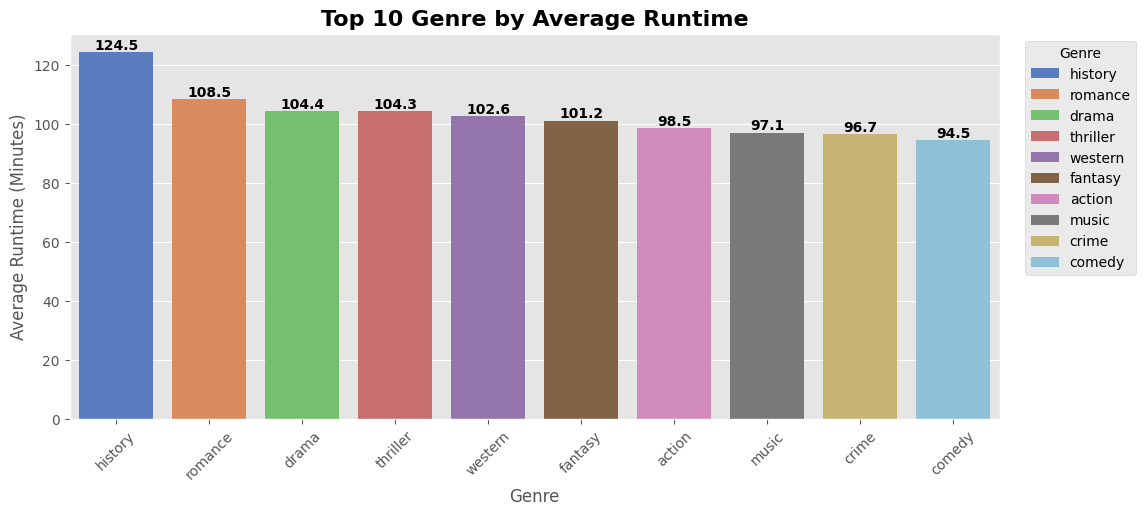

In [186]:
# Chart - 13 visualization code

# Group data by primary_genre and calculate average runtime
genre_runtime_avg = (
    df3.groupby(['primary_genre'])['runtime']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='runtime', ascending=False)
    .head(10)  # Take top 10 genres with the highest average runtime
)
# Set Figure Size
plt.figure(figsize=(12, 5))
# Create Bar Plot
ax = sns.barplot(x='primary_genre', y='runtime', data=genre_runtime_avg, palette='muted', hue = 'primary_genre', legend= True)

# Add Data Labels
for p in ax.patches:
    height = p.get_height()
    # Only add labels if the height is greater than zero
    if height > 0:
        ax.annotate(f'{height:.1f}',  # Format value to 1 decimal place
                    (p.get_x() + p.get_width()/2, height),  # Position at the top of the bar
                    ha='center', va='center', fontsize=10, fontweight='bold',
                    color='black', xytext=(0, 5), textcoords='offset points')  # Offset text slightly for better visibility

# Add Labels and Titles
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average Runtime (Minutes)", fontsize=12)
plt.title("Top 10 Genre by Average Runtime", fontsize=16, fontweight='bold')
# Add Legend
plt.legend(title="Genre", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45)
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an ideal choice-
* For comparing different movie genres based on their average runtime.
* It visually highlights which genres tend to have longer or shorter durations, making it easy to analyze trends.

##### 2. What is/are the insight(s) found from the chart?

* History movies have the longest average runtime (124.5 minutes), indicating they often have detailed storytelling and complex narratives.
* Romance movies follow with an average runtime of 108.5 minutes, suggesting they take time to develop emotional depth.
* Drama (104.4 min) and Thriller (104.3 min) genres have nearly the same runtime, showing that these genres require extended screen time for character and plot development.
* Western (102.6 min) and Fantasy (101.2 min) movies also tend to have long durations, likely due to the need for world-building and intricate plots.
* Action (98.5 min), Music (97.1 min), and Crime (96.7 min) movies have moderate runtimes, indicating faster-paced storytelling.
* Comedy movies have the shortest runtime (94.5 minutes), as humor-based films usually maintain concise and engaging plots.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Strategic content planning: Platforms like Netflix and Amazon Prime can optimize their content lengths based on audience preferences.
* Improved scheduling for theaters and streaming: Since history and romance movies have longer runtimes, they may require fewer daily screenings in theaters.
* Better user experience: Streaming services can recommend shorter movies (e.g., comedy and crime) for audiences looking for quick entertainment.
* Budgeting decisions: Longer movies require more production resources, so producers can plan budgets effectively based on the genre.

**Negative Impact:**
* Reduced watch completion rates: Viewers may not finish long movies (e.g., history and romance genres) in one sitting, affecting streaming analytics.
* Theater screening challenges: Movies with long runtimes reduce the number of daily screenings, limiting box office earnings.
* Attention span concerns: Modern audiences prefer shorter, engaging content, so genres with extended runtimes might struggle in digital streaming markets.

#### Chart - 14 - IMDB Score v/s TMDB Popularity (Numerical - Numerical)

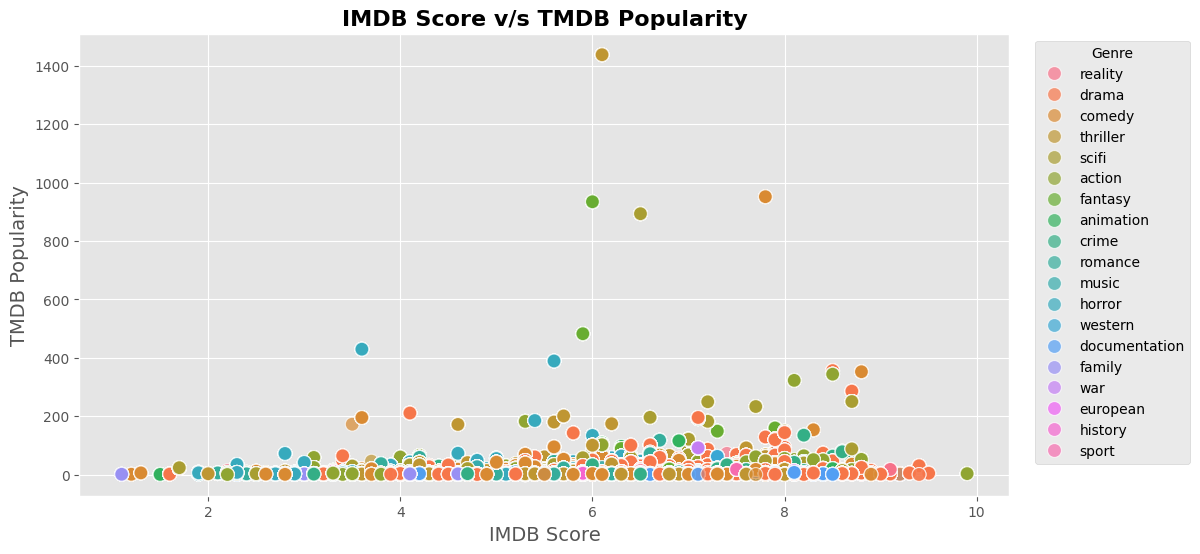

In [187]:
# Chart - 14 visualization code

# Set Figure Size
plt.figure(figsize=(12, 6))

# Create Scatter Plot
sns.scatterplot(data=df3, x='imdb_score', y='tmdb_popularity', color='blue',hue = 'primary_genre',s = 100, alpha = 0.7)

# Add Labels and Titles
plt.xlabel('IMDB Score', fontsize = 14)
plt.ylabel('TMDB Popularity', fontsize = 14)
plt.title('IMDB Score v/s TMDB Popularity', fontsize = 16, fontweight = 'bold')

# Add Legend
plt.legend(title="Genre", bbox_to_anchor=(1.02, 1), loc="upper left")

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for-
* Visualizing the relationship between IMDb scores (x-axis) and TMDB popularity (y-axis).
* It helps identify whether movies with higher IMDb ratings are generally more popular on TMDB.

##### 2. What is/are the insight(s) found from the chart?

* No clear correlation between IMDb score and TMDB popularity—movies with both low and high IMDb scores can have varying levels of popularity.
* A few movies with IMDb scores around 6-7 have extremely high TMDB popularity (>1000), meaning that some moderately rated movies still gain significant audience attention.
* Most movies cluster between IMDb scores of 4-8 and have low TMDB popularity (<200).
* Genres like Drama Thriller, and Sci-Fi appear frequently across different IMDb scores suggesting they have a wide audience reach regardless of rating.
* Some low-rated movies (IMDb 2-4) have relatively high TMDB popularity, possibly due to factors like viral trends, nostalgia, or cult followings.
* High IMDb-rated movies (8+) do not always guarantee high popularity—some highly-rated movies still have lower TMDB engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Streaming services (Netflix, Amazon Prime, etc.) can prioritize licensing movies based on TMDB popularity rather than just IMDb scores.
* Studios can focus on marketing efforts to boost visibility for high-rated but less popular films.
* Predicting trends—understanding that some mid-rated movies (6-7 IMDb) gain the most popularity can help in content curation.

**Negative Impact:**
* Ignoring mid-rated but high-engagement movies could lead to missed revenue opportunities.
* Overlooking social trends—some low-rated movies become viral due to memes or nostalgia, driving high TMDB popularity.

#### Chart - 15 - IMDB Score v/s TMDB Score (Numerical - Numerical)

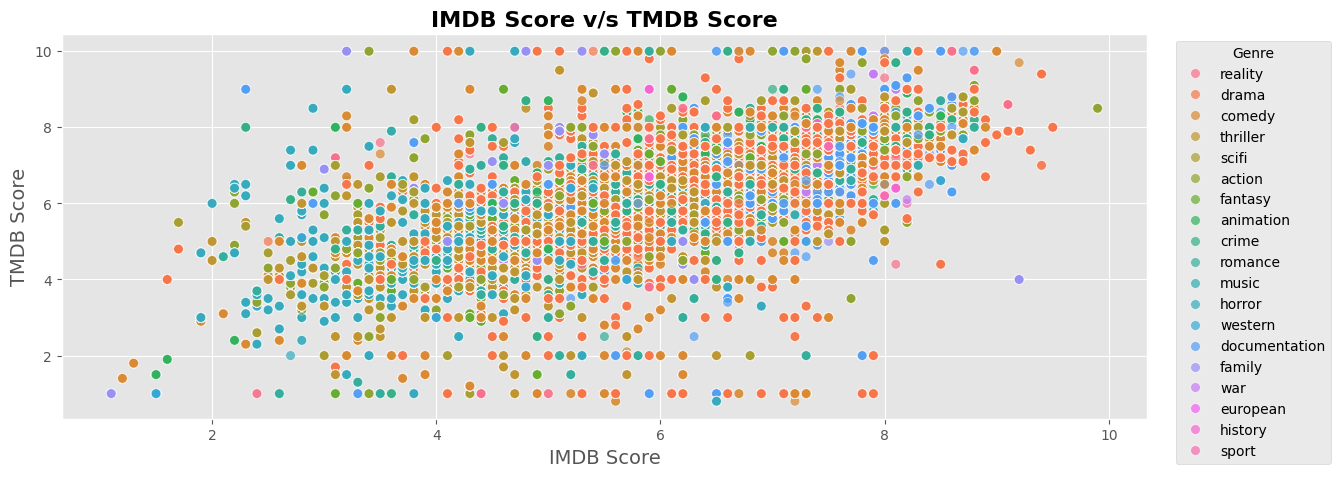

In [188]:
# Chart - 15 visualization code
# Set Figure Size
plt.figure(figsize=(14, 5))
# Create Scatter Plot
sns.scatterplot(data=df3, x='imdb_score', y='tmdb_score', color='red',s = 50, alpha = 0.7, hue = 'primary_genre')
# Add Titles and Labels
plt.xlabel('IMDB Score', fontsize = 14)
plt.ylabel('TMDB Score', fontsize = 14)
plt.title('IMDB Score v/s TMDB Score', fontsize = 16, fontweight = 'bold')
# Add Legend
plt.legend(title="Genre", bbox_to_anchor=(1.02, 1), loc="upper left")
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the best way to-
* Visualize the relationship between IMDb scores (x-axis) and TMDB scores (y-axis).
* It helps identify whether higher IMDb ratings correlate with higher TMDB ratings.

##### 2. What is/are the insight(s) found from the chart?

* Strong positive correlation between IMDb and TMDB scores—as IMDb scores increase, TMDB scores also tend to rise.
* Some variations exist—a few movies with high IMDb scores (8-10) have relatively lower TMDB scores (5-7) and vice versa.
* Most movies fall within IMDb 4-8 and TMDB 4-8 range, indicating that the majority of movies have mid-range ratings.
* Highly-rated movies on IMDb (8+) generally receive high TMDB scores (8+), showing alignment between the platforms.
* Genre distribution—Drama, Thriller, and Sci-Fi movies appear frequently across different IMDb scores, suggesting these genres are widely reviewed.
* Outliers are present—some low IMDb-rated movies (2-4) have higher TMDB scores (6-8), possibly due to different audience preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Streaming services (Netflix, Disney+, etc.) can prioritize movies that are highly rated on both IMDb and TMDB to attract more viewers.
* Marketers can analyze IMDb-TMDB score gaps to understand why certain movies perform better on one platform—differences in audience perception, review bombing, or cultural preferences.
* Studios can focus on improving audience engagement for mid-rated movies (6-7 range), as they have potential for growth.

**Negative Impact:**
* Some movies have high IMDb scores but lower TMDB scores—indicating that IMDb's critic base differs from TMDB's audience.
* Ignoring mid-rated movies (6-7) may cause missed opportunities—since they form the majority and have a chance to improve with better marketing or rebranding.
* Discrepancies in scoring could affect movie licensing—if platforms only select high IMDb-rated films, they might overlook popular TMDB-rated films.

#### Chart - 16 - Growth of Movies & TV Shows Over Time by Genre (Categorical - Numerical)

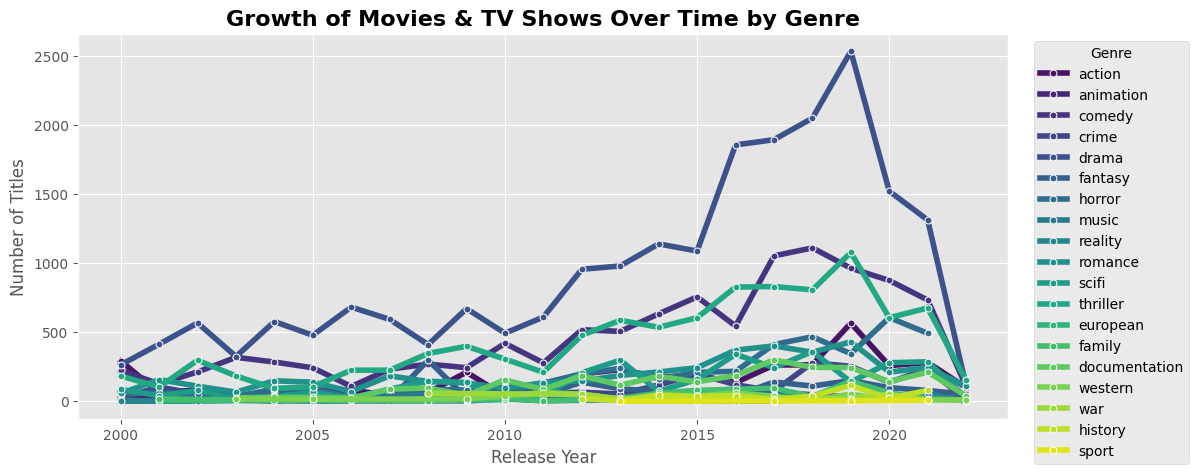

In [189]:
# Chart - 16 visualization code

# Group by release year and genre to count the number of titles
df_trend_genre = df3.groupby(['release_year', 'primary_genre']).size().reset_index(name='count')
# Set Figure Size
plt.figure(figsize=(12, 5))
# Create Line Plot
sns.lineplot(data=df_trend_genre, x='release_year', y='count', hue='primary_genre',marker='o', linestyle='-',
             linewidth=4, markersize=5, palette='viridis')
# Add Labels and Titles
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.title('Growth of Movies & TV Shows Over Time by Genre', fontsize=16, fontweight='bold')
# Add Legend
plt.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left')
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is the best choice to track the growth trend of movies and TV shows over time for different genres. It helps to:
* Identify trends in production over the years.
* Compare which genres have grown the most or declined.
* Spot peaks and drops in production, indicating possible industry shifts.

##### 2. What is/are the insight(s) found from the chart?

* Significant growth in content production after 2010, with a peak around 2019-2020 followed by a sharp decline.
* The drama genre dominates with the highest number of titles released, peaking around 2019.
* Thriller, romance, and sci-fi genres saw steady growth, especially post-2015.
* Reality TV saw noticeable growth in the mid-2010s but fluctuated afterward.
* The number of movies and TV shows declined sharply after 2020, likely due to the COVID-19 pandemic's impact on production.
* Genres like western, war, history, and sport remain the least produced categories throughout the years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Streaming services (Netflix, Disney+, Amazon Prime, etc.) can invest more in top-growing genres like drama, thriller, and sci-fi since they have shown consistent demand.
* Production houses can plan future projects by analyzing genre popularity trends—for example, genres like sci-fi and thriller have seen increasing growth, making them a good investment.
* Marketers can focus promotions on genres that are growing to maximize engagement and revenue.
* Studios can analyze the 2020 decline and strategize ways to recover, possibly by shifting to digital-first productions.

**Negative Impact:**
* The sharp decline after 2020 suggests industry disruptions, possibly due to the pandemic. Studios and platforms relying only on high-budget productions might face delays and losses.
* Certain genres like western, war, and history remain consistently low in production and investing heavily in these genres might not yield high returns.
* Reality TV fluctuates—while it grew during the 2010s, its inconsistent trend might indicate that audiences lose interest quickly.
* Saturation risk in drama, thriller, and sci-fi dominate, meaning new productions must offer unique content to stand out.

#### Chart - 17 - Top 10 Genres with the Highest Median Seasons (Categorical - Numerical)

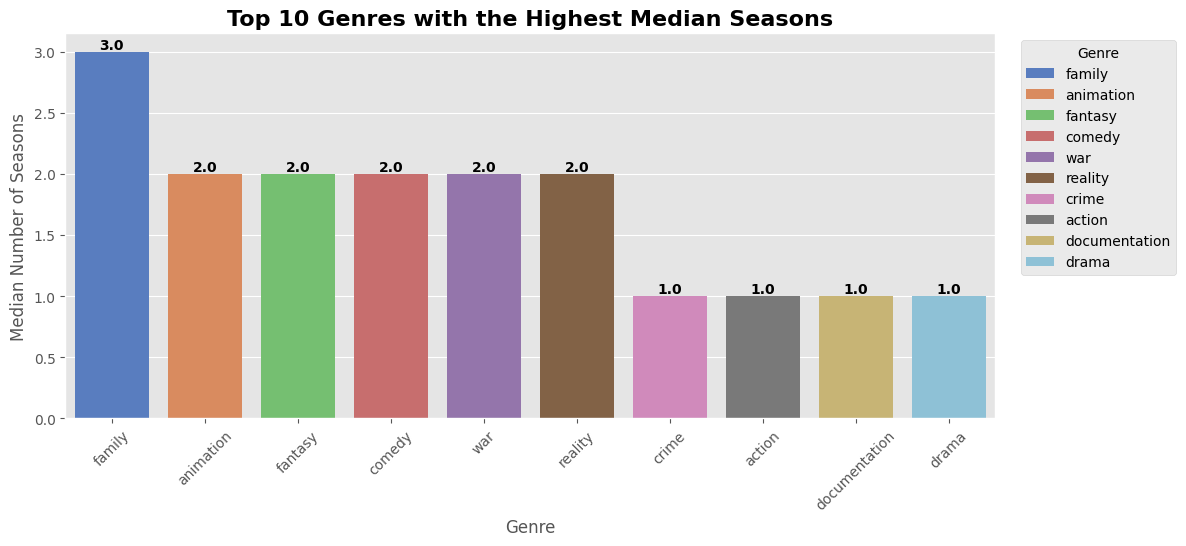

In [190]:
# Chart - 17 visualization code

# Filtering df to include only TV Shows
tv_shows_data = df3[df3['content_type'] == 'SHOW']

# Grouping data by genre and calculating the median number of seasons
genre_seasons = tv_shows_data.groupby('primary_genre')['seasons'].median().sort_values(ascending=False).head(10).reset_index()

# Set Figure Size
plt.figure(figsize=(12, 5))

# Create bar plot
ax = sns.barplot(x='primary_genre', y='seasons', data=genre_seasons, palette='muted', hue = 'primary_genre', legend= True)

# Add Data Labels
for p in ax.patches:
    height = p.get_height()

    # Only add labels if the height is greater than zero
    if height > 0:
        ax.annotate(f'{height:.1f}',  # Format value to 1 decimal place
                    (p.get_x() + p.get_width()/2, height),  # Position at the top of the bar
                    ha='center', va='center', fontsize=10, fontweight='bold',
                    color='black', xytext=(0, 5), textcoords='offset points')  # Offset text slightly for better visibility

# Add Labels and Titles
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Median Number of Seasons", fontsize=12)
plt.title("Top 10 Genres with the Highest Median Seasons", fontsize=16, fontweight='bold')

# Add Legend
plt.legend(title="Genre", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45)

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is the best choice to visualize the top 10 genres with the highest median number of seasons because:
* It clearly shows the comparison between genres.
* It highlights which genres tend to have longer-running TV shows.
* It helps in identifying which genres are more sustainable for long-term content production.

##### 2. What is/are the insight(s) found from the chart?

* The "Family" genre has the highest median number of seasons (3.0), meaning shows in this genre tend to last longer than others.
* Genres like Animation, Comedy, Fantasy, Reality, and War have a median of 2 seasons, suggesting moderate longevity.
* Drama, Crime, Action, and Documentation have the lowest median (1 season), meaning most shows in these genres do not last beyond the first season.
* Family-oriented shows tend to be more sustainable, possibly due to consistent demand from audiences (e.g., children and parents watching together).
* Genres like Action and Crime have shorter runs, possibly due to higher production costs, lower audience retention, or increased competition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Streaming platforms can invest more in long-running genres like Family, Animation, and Comedy since they have a higher median season count.
* Producers can prioritize developing TV shows in genres that have historically lasted longer, ensuring higher return on investment.
* Marketers can focus promotions on family-friendly content, as it has a history of longer audience engagement.
* Studios can strategize for short-lived genres (Action, Crime, Drama) by ensuring stronger storytelling or limited-series formats to increase engagement.

**Negative Impact:**
* Genres like Action, Crime, and Drama have a median of only 1 season, suggesting a high cancellation rate. Studios investing heavily in these genres might face lower returns due to short show lifespans.
* The War genre has a higher median (2 seasons) but remains niche, indicating limited audience reach. Heavy investment here might not be as profitable.
* Documentation shows have shorter lifespans, suggesting that audience engagement drops quickly. Platforms relying on these genres might struggle with retention.

#### Chart - 18 - Top 10 Most Popular TV Shows (Categorical - Numerical Variable)

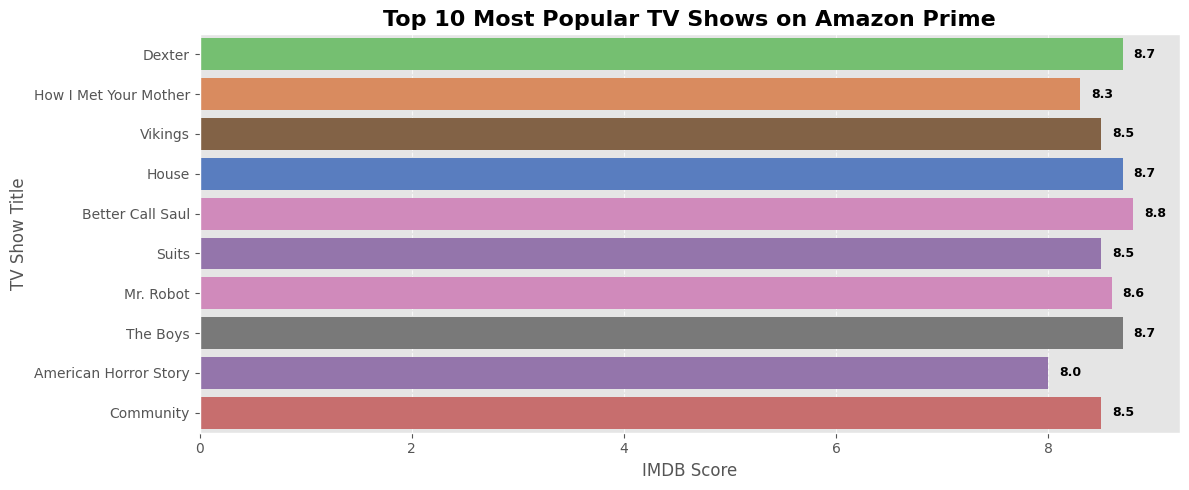

In [191]:
# Chart - 18 visualization code

# Filter only TV shows
tv_shows = df3[df3['content_type'] == 'SHOW']

# Rank TV shows based on IMDB votes, IMDB score, and TMDB popularity
tv_shows = tv_shows.sort_values(by=['imdb_votes', 'imdb_score', 'tmdb_popularity'], ascending=[False, False, False])

# Select top 10 most popular TV shows
popular_tv_shows = tv_shows[['title', 'release_year', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']].drop_duplicates().head(10)

# Create Bar Plot
plt.figure(figsize=(12, 5))
sns.barplot(
    data=popular_tv_shows,
    x='imdb_score',
    y='title',
    palette='muted',
    hue='release_year',
    dodge=False,
    legend = False
)

# Add data labels
for index, value in enumerate(popular_tv_shows['imdb_score']):
    plt.text(value + 0.1, index, f"{value:.1f}", va='center', fontsize=9,fontweight='bold')

# Add Labels & Titles
plt.xlabel("IMDB Score", fontsize=12)
plt.ylabel("TV Show Title", fontsize=12)
plt.title("Top 10 Most Popular TV Shows on Amazon Prime", fontsize=16, fontweight='bold')

# Add Grid
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Layout View
plt.tight_layout()
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because-
* It effectively visualizes categorical data (TV show titles) and their corresponding IMDb scores.
* Since TV show names are typically long, a horizontal orientation prevents overlapping labels and ensures readability.
* Additionally, it makes it easier to compare IMDb scores across the top 10 most popular shows.

##### 2. What is/are the insight(s) found from the chart?

* The highest-rated show among the top 10 is Better Call Saul with an IMDb score of 8.8.
* Other top-rated shows include Dexter, House, and The Boys, all with a score of 8.7.
* American Horror Story has the lowest IMDb score among the top 10, at 8.0.
* The IMDb scores of the top 10 shows are closely clustered, ranging from 8.0 to 8.8, suggesting that all these shows have high audience approval.
* The presence of well-known titles like How I Met Your Mother, Vikings, and Mr. Robot indicates that Amazon Prime's most popular shows include a mix of genres such as crime, drama, thriller, and sitcoms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Content Acquisition & Licensing: Amazon Prime can focus on acquiring similar high-rated shows, increasing user engagement and retention.
* Personalized Recommendations: Users who watch these top-rated shows can be recommended similar content, enhancing user experience.
* Marketing & Promotion: Shows with higher IMDb ratings can be highlighted in advertisements to attract new subscribers.
* Genre-Based Insights: Since the top shows cover genres like crime, drama, and thriller, Prime Video can invest in producing or acquiring similar content to maintain audience interest.

**Negative Impact:**

Not necessarily, but a potential risk is over-reliance on existing popular shows without investing in fresh, unique content. If Amazon Prime focuses too much on already famous titles and does not introduce new, original series, it might struggle to retain long-term subscribers who seek fresh entertainment. A diversified content strategy is necessary to maintain and grow the platform’s user base.

#### Chart - 19 - Top 10 Countries Producing Movies & TV Shows Over Time (Categorical - Numerical)

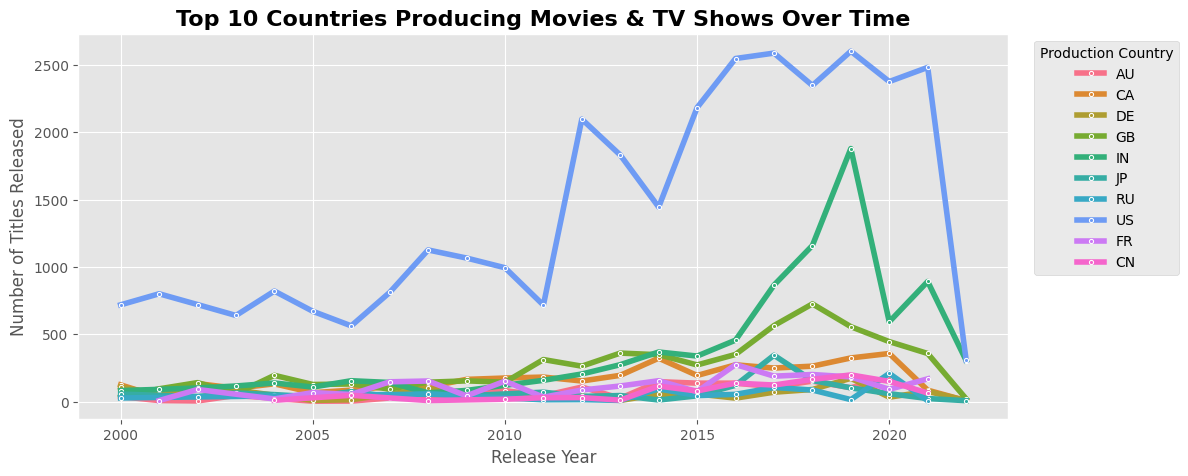

In [192]:
# Chart - 19 visualization code

# Get the top 10 countries by number of titles produced
top_country_by_count = (
    df3['primary_country']
    .value_counts()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(10)  # Select top 10 countries
)['primary_country'].tolist()  # Extract country names as a list

# Filter df to include only these top 10 countries
top_country_data = df3[df3['primary_country'].isin(top_country_by_count)]

# Count the number of titles by year and country
df_trend_country = top_country_data.groupby(['release_year', 'primary_country']).size().reset_index(name='count')

# Set Figure Size
plt.figure(figsize=(12, 5))
# Create line plot
sns.lineplot(data=df_trend_country, x='release_year', y='count', hue='primary_country', marker='o', linestyle='-',
             linewidth=4, markersize = 3)
# Add Titles and Labels
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Released', fontsize=12)
plt.title('Top 10 Countries Producing Movies & TV Shows Over Time', fontsize=16, fontweight='bold')
# Add legend
plt.legend(title='Production Country', bbox_to_anchor=(1.02, 1), loc='upper left')
# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is ideal for analyzing the growth of movies and TV shows production over time because:
* It effectively shows trends and changes in production numbers across multiple countries.
* It helps compare growth rates of different countries over the years.
* It highlights spikes, dips, and industry shifts, making it useful for understanding how global production has evolved.

##### 2. What is/are the insight(s) found from the chart?

* The United States (US) dominates the industry, producing the highest number of movies and TV shows over time, with a sharp increase around 2010-2020.
* India (IN) has seen rapid growth in production after 2015, peaking significantly around 2020.
* The United Kingdom (GB) and Germany (DE) also show steady growth, though their production levels remain much lower than the US and India.
* Many other countries, including Canada (CA), France (FR), and China (CN), have a relatively lower but consistent contribution.
* The US had a decline post-2020, which could be due to external factors like the COVID-19 pandemic, changes in streaming demand, or industry slowdowns.
* India saw a major rise in production between 2015-2020, likely driven by digital streaming platforms and the expansion of Bollywood and regional film industries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Streaming services can invest in content from India and the UK, given their rising production trends.
* Hollywood (US) should focus on sustaining post-2020 production levels by adapting to changing viewer demands and distribution models.
* International collaborations can be strengthened, particularly between countries with increasing production like India and Germany.
* Investors can target high-growth regions for film and TV production investments, especially in India and emerging European markets.

**Negative Impact:**
* The US saw a drop in production post-2020, which could indicate a slowdown in Hollywood's traditional dominance. Factors like COVID-19, industry strikes, and changing media consumption habits may have contributed.
* Countries like France and Russia show stagnation or slight declines, suggesting that their industries might be facing challenges in production budgets, regulations, or audience reach.
* Despite a rising trend in India, the sudden peak in production may not be sustainable, as excessive content creation can lead to quality dilution and market saturation.

#### Chart - 20 - Top 10 Most Popular Movies (Categorical - Numerical Variable)

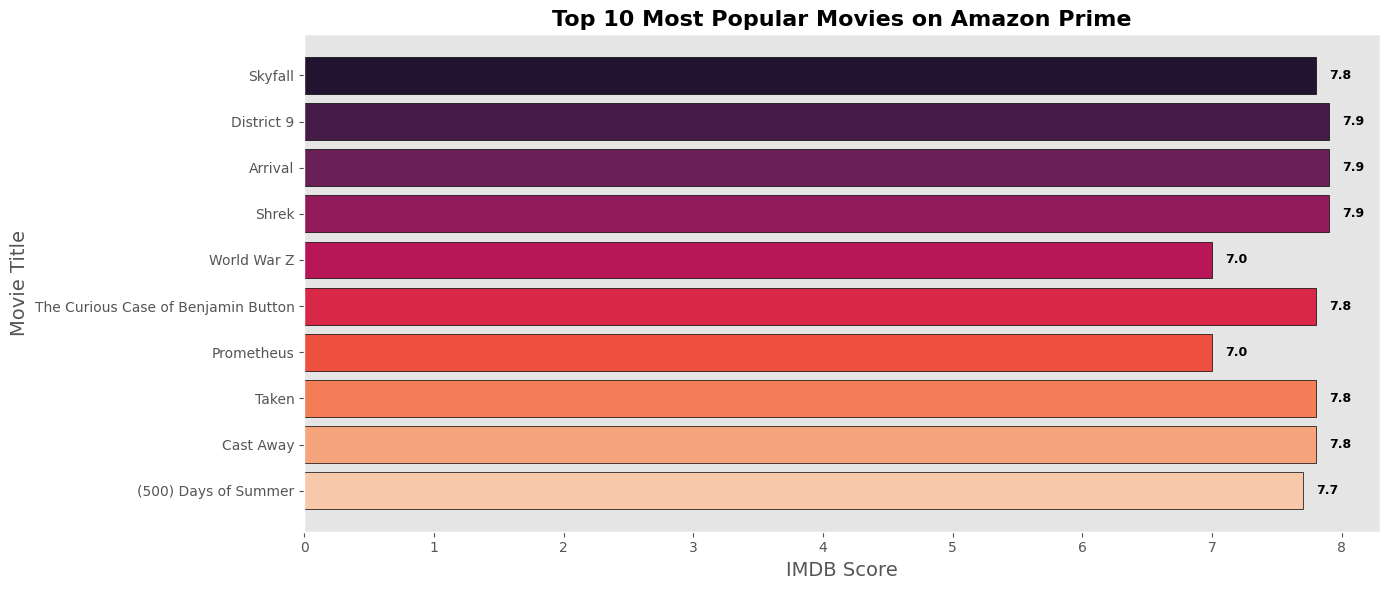

In [193]:
# Chart - 18 visualization code

# Filter only Movies
movies = df3[df3['content_type'] == 'MOVIE']

# Rank movies based on IMDB votes, IMDB score, and TMDB popularity
movies = movies.sort_values(by=['imdb_votes', 'imdb_score', 'tmdb_popularity'], ascending=[False, False, False])

# Select top 10 most popular movies
popular_movies = movies[['title', 'release_year', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']].drop_duplicates().head(10)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Define color palette (bold colors)
color_palette = sns.color_palette("rocket", len(popular_movies))

# Create a horizontal bar chart
bars = ax.barh(popular_movies['title'], popular_movies['imdb_score'], color=color_palette, edgecolor='black')

# Add data labels for each bar
for bar, score in zip(bars, popular_movies['imdb_score']):
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f"{score:.1f}", ha='left', va='center', fontsize=9, fontweight='bold')
# Set Grid
plt.grid(False)
# Set labels and title
ax.set_xlabel("IMDB Score", fontsize=14)
ax.set_ylabel("Movie Title", fontsize=14)
ax.set_title("Top 10 Most Popular Movies on Amazon Prime", fontsize=16, fontweight='bold')

# Invert Y-axis to have the highest-ranked movie at the top
ax.invert_yaxis()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

I selected a horizontal bar chart because-
* It is an effective way to display categorical data (movie titles) alongside their IMDb scores.
* The horizontal format ensures readability for longer movie names and makes it easy to compare IMDb scores across the top 10 most popular movies.
* Additionally, the gradient color scheme enhances visual appeal while differentiating between movies based on their IMDb ratings.

##### 2. What is/are the insight(s) found from the chart?

* The highest-rated movies among the top 10 are District 9, Arrival, and Shrek, all with an IMDb score of 7.9.
* Other high-rated movies include Skyfall, The Curious Case of Benjamin Button, Taken, and Cast Away, all scoring 7.8.
* World War Z and Prometheus have the lowest IMDb scores in the list, both at 7.0.
* The IMDb scores of the top 10 movies are closely clustered, ranging from 7.0 to 7.9, indicating all these movies have a strong audience approval.
* The list includes a diverse mix of genres, such as action (Skyfall, Taken), sci-fi (Arrival, Prometheus, District 9, World War Z), adventure (Cast Away), and drama (500 Days of Summer, The Curious Case of Benjamin Button), showing that Amazon Prime’s popular movies cater to a variety of audience preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Content Strategy: Amazon Prime can acquire or produce similar high-rated movies to maintain and attract more viewers.
* Genre-Specific Investments: Since sci-fi and action genres are prominent among top movies, Prime Video can invest in more high-quality movies in these categories.
* Marketing Campaigns: Highlighting top-rated movies in promotional campaigns can enhance user engagement.
* Personalized Recommendations: Users who watch these movies can be recommended similar content to improve their viewing experience.

**Negative Impact:**

Not directly, but a potential risk is the relatively lower IMDb ratings compared to TV shows. The highest movie rating in this list is 7.9, whereas the top-rated TV shows in the previous visualization had scores up to 8.8. This suggests that Amazon Prime’s movie selection may not be as critically acclaimed as its TV show library, which could impact long-term engagement. To mitigate this, Prime Video should focus on licensing or producing higher-rated movies (8.0+) to strengthen its catalog.

### **Multivariate Analysis**

#### Chart - 21 - Correlation Heatmap

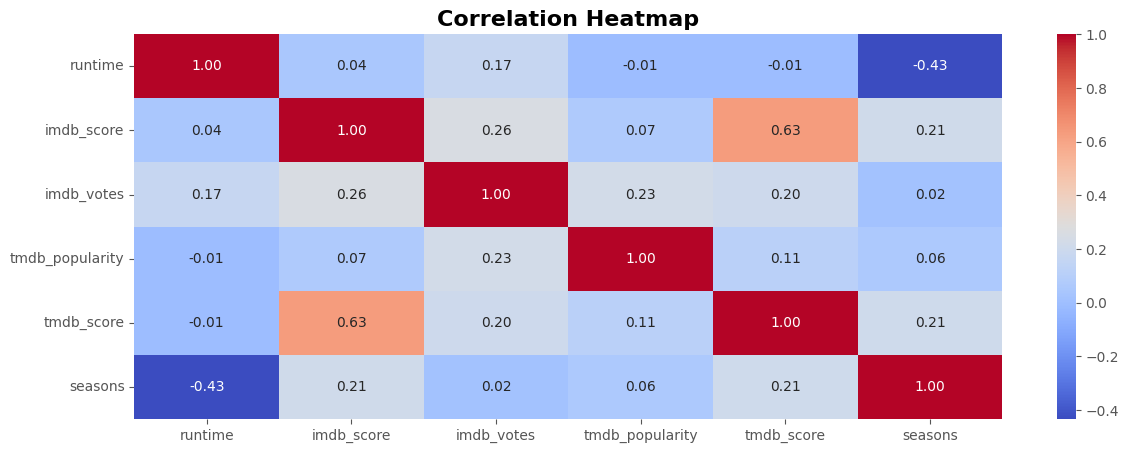

In [194]:
# Correlation Heatmap visualization code

# Selecting relevant numerical columns for correlation analysis
correlation_columns = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'seasons']

# Compute the correlation matrix
correlation_matrix = df3[correlation_columns].corr()

# Set Figure Size
plt.figure(figsize=(14, 5))
# Create Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Add Title
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is an excellent choice for this analysis because:
* It visually represents the relationships between numerical variables using colors, making it easy to interpret.
* It helps identify strong positive or negative correlations between variables, which is crucial for understanding key influencing factors.
* It provides insights for feature selection in machine learning models or further statistical analysis.

##### 2. What is/are the insight(s) found from the chart?

* IMDB score and TMDB score are strongly correlated (0.63) → Movies or TV shows with a high IMDB score also tend to have a high TMDB score, suggesting consistency in audience ratings across platforms.
* IMDB votes and IMDB score have a moderate positive correlation (0.26) → More votes on IMDB generally indicate a higher score, but the relationship is not very strong.
* Runtime and number of seasons have a negative correlation (-0.43) → TV shows with more seasons tend to have shorter individual episode runtimes.
* IMDB popularity has low correlation with IMDB score (0.07) → Popularity doesn't necessarily mean higher ratings, implying that some highly popular movies/TV shows might not have high critical ratings.
* Seasons and TMDB score have a weak positive correlation (0.21) → Shows with more seasons may have slightly higher TMDB scores, but the relationship is weak.
* Runtime has a very weak correlation with IMDB score (0.04) → Longer movies or TV shows don't necessarily receive higher or lower ratings.

#### Chart - 22 - Pair Plot

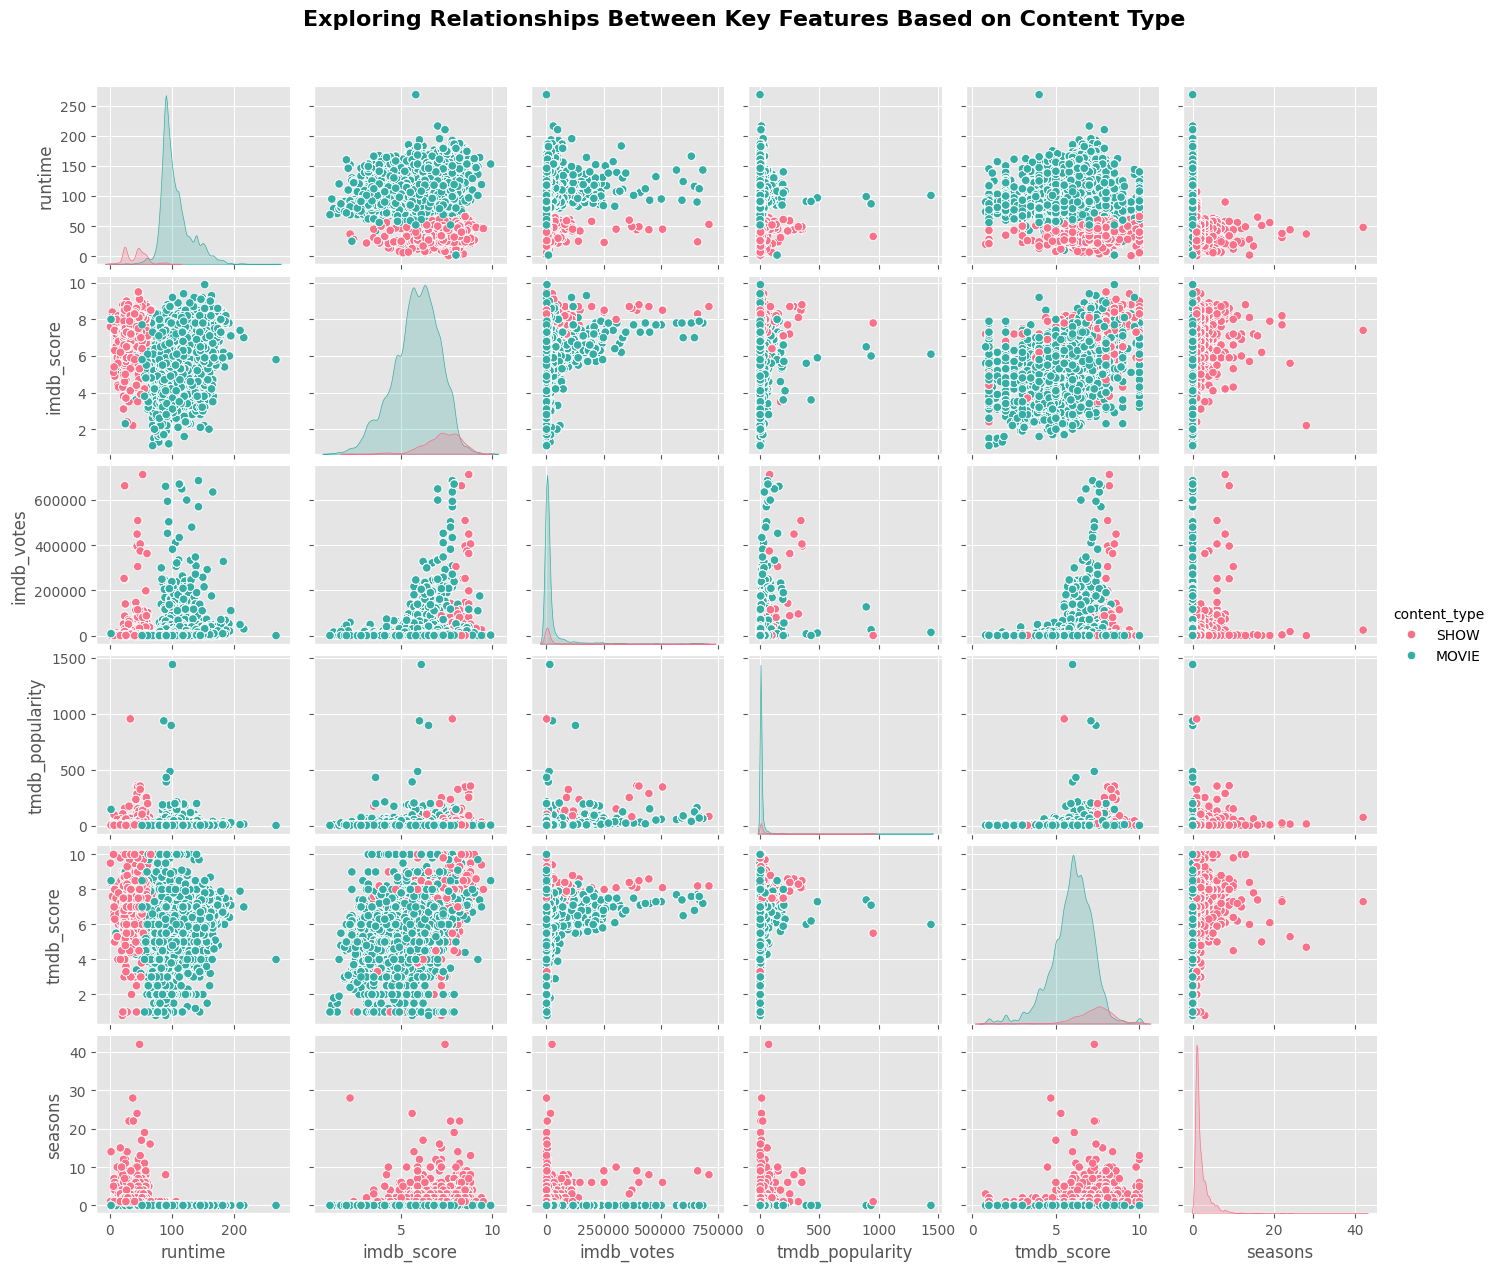

In [195]:
# Pair Plot visualization code
# Selecting relevant numerical columns
correlation_columns = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'seasons']


# Creating pair plot with 'type' as hue
pairplot = sns.pairplot(
    df3,
    vars=correlation_columns,
    hue='content_type',  # Color based on 'content_type'
    palette='husl',
    diag_kind='kde',  # Kernel Density Estimate for diagonal

)

# Adjusting the figure size
pairplot.fig.set_size_inches(15, 12)


# Adjust the title and overall layout
pairplot.fig.suptitle('Exploring Relationships Between Key Features Based on Content Type', fontsize=16, fontweight='bold', y=1.05)


# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot (scatter plot matrix) is chosen because:
* It visualizes relationships between multiple numerical variables at once, helping identify trends and patterns.
* It differentiates between Movies (blue) and TV Shows (pink), allowing comparisons across content types.
* The diagonal density plots show the distribution of each variable, making it easier to see where values are concentrated.

##### 2. What is/are the insight(s) found from the chart?

* **Runtime Distribution:**
Movies generally have higher runtime (with a peak around 90–120 minutes).
TV shows have shorter individual runtime but multiple seasons, as seen in the scatter relationships.

* **IMDB Score vs. TMDB Score:**
Both movies and TV shows follow a similar score distribution, indicating consistency in ratings across platforms.
However, some movies have extreme IMDB scores, while TV shows are more evenly distributed.

* **IMDB Votes vs. Popularity:**
More votes generally lead to higher popularity, but movies have significantly higher votes than TV shows in some cases.
Some highly popular movies don't necessarily have high IMDB votes, suggesting external factors influencing popularity.

* **Seasons vs. Other Variables:**
Movies have only one season, while TV shows span multiple seasons, as expected.
TV shows with fewer seasons tend to have a higher concentration of votes and popularity, suggesting that short series might be more engaging.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. **Focus on High-Rated Content Acquisition & Production-**
* The top TV shows have higher IMDb ratings (up to 8.8) compared to movies (7.9 max).
* This indicates that TV series are a major driver of audience engagement.
Amazon Prime should invest in producing or acquiring high-rated original content, particularly in genres that perform well, such as drama, sci-fi, and crime/thrillers.

2. **Leverage Popular Genres for Targeted Content Strategy-**
* Sci-fi, action, and drama movies dominate the top 10 movie list, while crime, thriller, and comedy TV shows are highly rated.
* Amazon Prime can prioritize licensing more high-quality content in these genres to align with viewer interests.

3. **Optimize Recommendation Algorithm-**
* With clear insights into audience preferences, Prime Video should refine its AI-based recommendation system to suggest content that aligns with users’ past viewing behavior.
* Highlighting highly-rated and popular content can improve watch time and user satisfaction.

4. **Strengthen Marketing & User Engagement Strategies-**
* Amazon Prime should create personalized marketing campaigns around top-rated content, emphasizing IMDb scores and audience popularity.
* Seasonal promotions and curated watchlists can increase content discovery and retention rates.

5. **Improve Movie Catalog Quality-**
* While TV shows are highly rated, some of the top 10 movies have moderate IMDb scores (as low as 7.0).
* Acquiring more critically acclaimed or audience-favorite movies (8.0+ ratings) can enhance the movie library's appeal.

6. **Data-Driven Decisions for Future Content Investments-**
* The analysis of viewership trends, ratings, and genres should guide future content acquisition and production decisions to maximize audience engagement and ROI.

By implementing these strategies, Amazon Prime Video can enhance content engagement, attract a larger audience, and maintain a competitive edge in the streaming industry.

# **Conclusion**

The analysis of IMDb ratings and content performance on Amazon Prime Video highlights key audience preferences. TV shows tend to have higher ratings than movies, with crime, thriller, and comedy genres leading in popularity. For movies, sci-fi, action, and drama are top-performing genres.

To enhance user engagement, Amazon Prime should focus on acquiring high-rated content in these genres and optimizing its recommendation system. Personalized marketing can further boost viewer interest. Additionally, improving the quality of the movie catalog by acquiring more critically acclaimed titles will strengthen the platform's appeal.

By leveraging these insights, Amazon Prime can refine its content strategy, improve user satisfaction, and drive subscription growth.